**Objective**

I aim to explore the data scientist salary, more specifically within the Asian continent , taking into account aspects like experience level, employment type, company size, and geographical location. This analysis is based on "2023 Data Scientists Salary" dataset.

By focusing on the salary statistics within a specific continent and doing a detailed analysis, I hope to provide insights into how job features and regional considerations might affect salary levels of this particular profession/industry.

**Methodology**

In [ ]:
from pandas.core.arrays.categorical import coerce_indexer_dtype
import pandas as pd
!pip install pycountry
import pycountry as pc # Using this library to convert the country codes to country names so that it is easier to visualize data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
!pip install country_converter
import country_converter as coco


sns.set_theme()
sns.set(rc = {"figure.figsize":(10,6), "figure.dpi":300})
df = pd.read_csv('ds_salaries (1).csv')
df


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 76.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=a757de0318d06ebd498a72fe7ea303fce2df402cd6d1ede89d82351c886f35c9
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.0 MB/s eta 0:00:00


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
# Check for duplicates:

duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)


number of duplicate rows:  (1171, 11)


In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
company_location = pd.read_csv('Company location.csv')
company_location

,company_location,country,continent
0,AE,UAE,Asia
1,AL,Albania,Europe
2,AM,Armenia,Europe
3,AR,Argentina,Americas
4,AS,Samoa,Oceania
...,...,...,...
67,TH,Thailand,Asia
68,TR,Turkyie,Europe
69,UA,Ukraine,Europe
70,US,America,Americas


In [ ]:
employee_residence = pd.read_csv('employee residence.csv')
employee_residence

,employee_residence,continent,note
0,AE,Asia,NaN
1,AM,Europe,NaN
2,AR,Americas,NaN
3,AS,Oceania,NaN
4,AT,Europe,NaN
...,...,...,...
73,TR,Europe,NaN
74,UA,Europe,NaN
75,US,Americas,NaN
76,UZ,Asia,Uzbekistan


In [ ]:
# By using DataFrame.merge()
merge1 = df.merge(company_location, how = 'left', on='company_location').merge(employee_residence,how = 'left', on='employee_residence')
# print(merge1)

In [ ]:
 # Dat grouping according to Asian countries
Asian_companies = merge1[merge1['continent_x'] == 'Asia']

In [ ]:
# rename for better understanding

def replace_values(column_name,old_value,new_value):
    Asian_companies[column_name] = Asian_companies[column_name].replace(old_value,new_value)

replace_values('experience_level','SE','Senior Level')
replace_values('experience_level','MI','Mid Level')
replace_values('experience_level','EN','Entry Level')
replace_values('experience_level','EX','Executive Level')

replace_values('employment_type','FT','Full Time')
replace_values('employment_type','PT','Part Time')
replace_values('employment_type','CT','Contract')
replace_values('employment_type','FL','Freelancing')

replace_values('company_size','M','Medium')
replace_values('company_size','L','Large')
replace_values('company_size','S','Small')

replace_values('remote_ratio',0,'Onsite')
replace_values('remote_ratio',100,'Remote')
replace_values('remote_ratio',50,'Hybrid')
replace_values('job_title','Machine Learning Engineer','ML Engineer')


<ipython-input-10-a2824b7f6282>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Asian_companies[column_name] = Asian_companies[column_name].replace(old_value,new_value)


In [ ]:
# Group by company size (Asia)
Asian_companies_size= Asian_companies.groupby('company_size').size()
print (Asian_companies_size)

company_size
Large     52
Medium    20
Small     18
dtype: int64


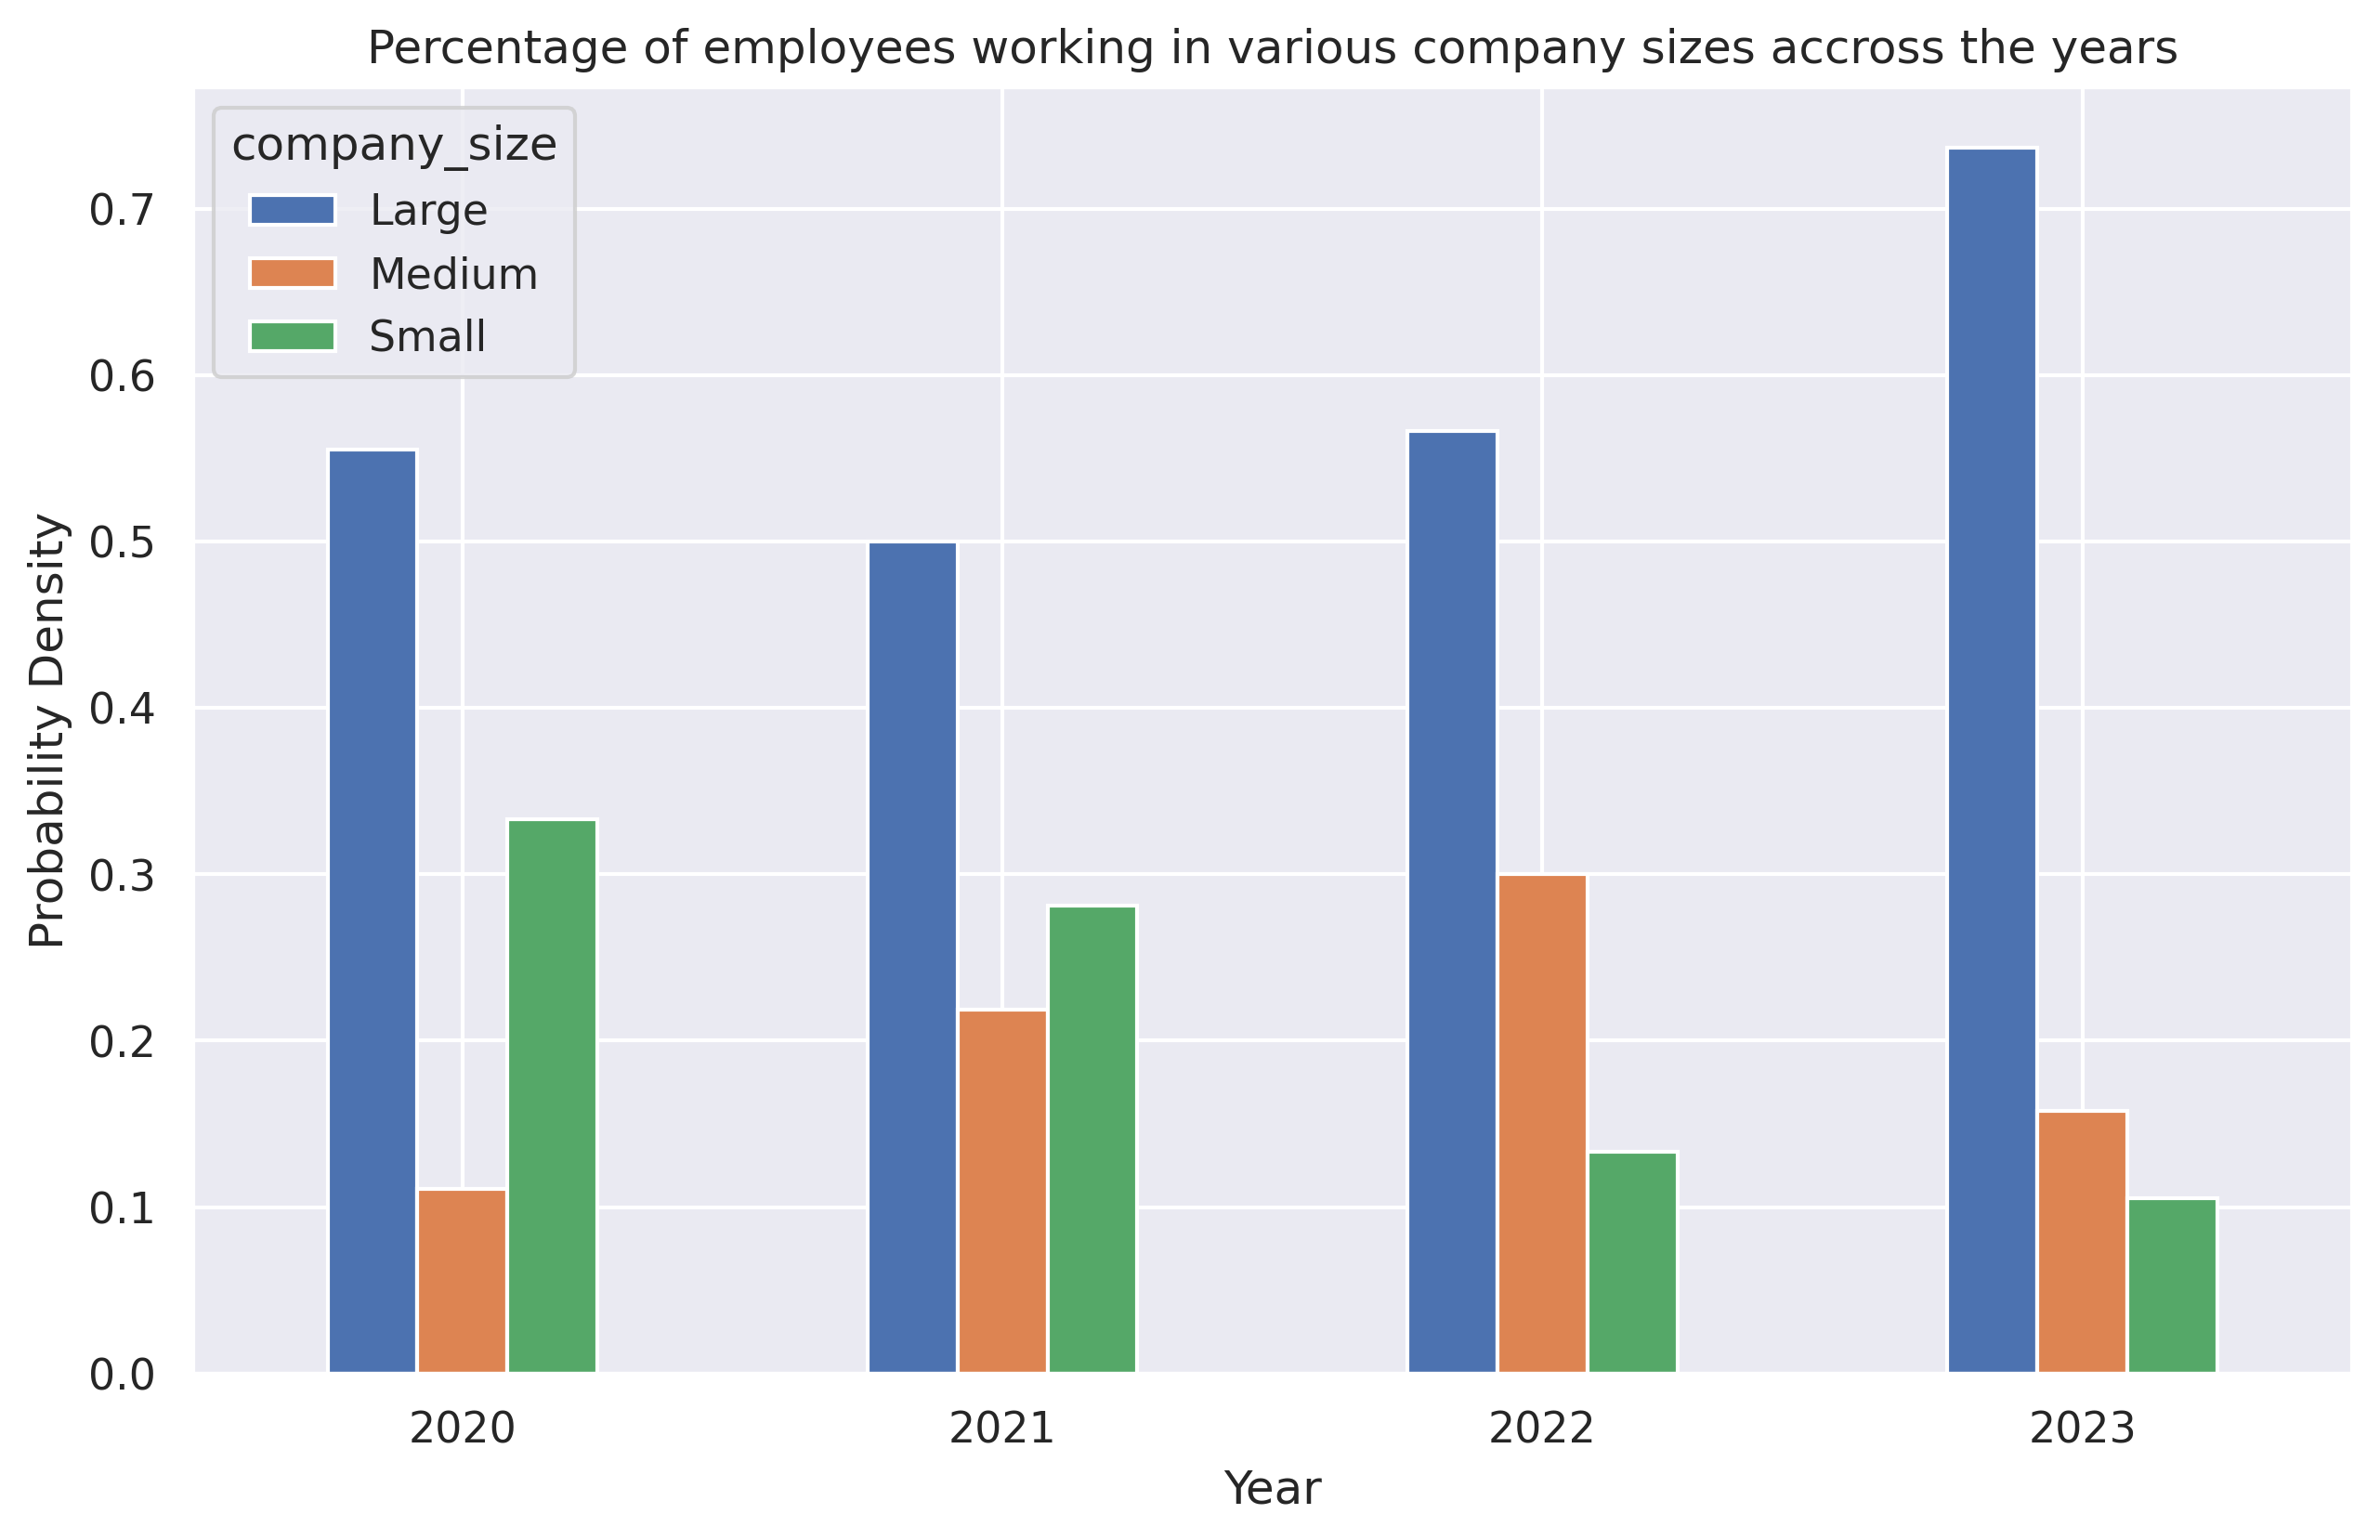

In [ ]:
# Analyze the percentage of employees working in each type of company 2020 - 2023
pd.crosstab(Asian_companies['work_year'],Asian_companies['company_size'], normalize = 'index').plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.title('Percentage of employees working in various company sizes accross the years')
plt.show()

The effects of the pandemic and economic recession can be clearly seen in this image. In 2020 and 2021, the percentage of employees working in Data Science in mid-sized companies is lower than the percentage of employees working in large-sized companies. A significant proportion of workers are also working in small-scale companies. Since governments around the world have also increased interest rates after the pandemic (2002-2003), funding for startups may have decreased. We are likely to see a decline in the proportion of people working in small-sized companies from 2020 to 2023.

In summary:
- The effects of the pandemic and economic downturn.

- Recent hiring freezes and tech-layoffs in recent years.

- Pandemic  ends: the number of employees moving from medium-sized companies to large companies rises significantly.


In [ ]:
# Change of company size in Asia 2020 - 2023
Asian_companies = merge1[merge1['continent_x'] == 'Asia']
company_size_Asia = Asian_companies.groupby('work_year')['company_size'].value_counts()
company_size_Asia

work_year  company_size
2020       L                5
           S                3
           M                1
2021       L               16
           S                9
           M                7
2022       L               17
           M                9
           S                4
2023       L               14
           M                3
           S                2
Name: company_size, dtype: int64

In [ ]:
company_size_Asia_salary = Asian_companies.groupby('company_size')['salary_in_usd'].mean()
company_size_Asia_salary

company_size
L    48314.423077
M    31142.900000
S    63174.777778
Name: salary_in_usd, dtype: float64

In [ ]:
# How many Asian countries are there in the dataset
Asian_countries = merge1[merge1['continent_x'] == 'Asia']
count_Asian_countries = Asian_countries.groupby('continent_x')['company_location'].nunique()
print(count_Asian_countries)

continent_x
Asia    15
Name: company_location, dtype: int64


In [ ]:
# Number of companies in each continent
merge1['continent_x'].value_counts().nlargest(10)

Americas    2053
Europe       409
Asia          90
Oceania       18
Africa        14
Name: continent_x, dtype: int64

The data industry
Rapid growth; relatively new in Asia, whereas the profession is more or less saturated in Americas and Europe.

A lot of room to grow across Asia-Pacific.


In [ ]:
# Top 5 countries with the highest number of companies in Asia
top_company_Asia = Asian_companies['company_location'].value_counts()
print(top_company_Asia)
top_company_Asia_list = Asian_companies['company_location'].value_counts().nlargest(5).index.tolist()
print(top_company_Asia_list)

IN    57
SG     6
JP     6
PK     4
TH     3
AE     3
IL     2
ID     2
HK     1
VN     1
IR     1
PH     1
MY     1
IQ     1
CN     1
Name: company_location, dtype: int64
['IN', 'SG', 'JP', 'PK', 'TH']


In [ ]:
country = coco.convert(names = Asian_companies['company_location'], to = "ISO3")
Asian_companies['company_location'] = country
residence = Asian_companies['company_location'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Employee Loaction On Map')
fig.show()

<ipython-input-18-befe0da5eb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Asian_companies['company_location'] = country


In [ ]:
# proportion of employees working from home in Asia
remote_ratio_Asia  = merge1[merge1['continent_y'] == 'Asia']
count_remote_ratio_Asia = remote_ratio_Asia.groupby(['remote_ratio'])['continent_y'].value_counts()
print(count_remote_ratio_Asia)

remote_ratio  continent_y
0             Asia           19
50            Asia           36
100           Asia           57
Name: continent_y, dtype: int64


In [ ]:
AVG_Salary_country_in_Asia = Asian_companies.groupby('country')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index().head(15)
AVG_Salary_country_in_Asia

,country,salary_in_usd
0,Israel,271446.0
1,Japan,114127.0
2,China,100000.0
3,Iran,100000.0
4,Iraq,100000.0
5,UAE,100000.0
6,Hong Kong,65062.0
7,Singapore,53675.0
8,Philippines,50000.0
9,Malaysia,40000.0


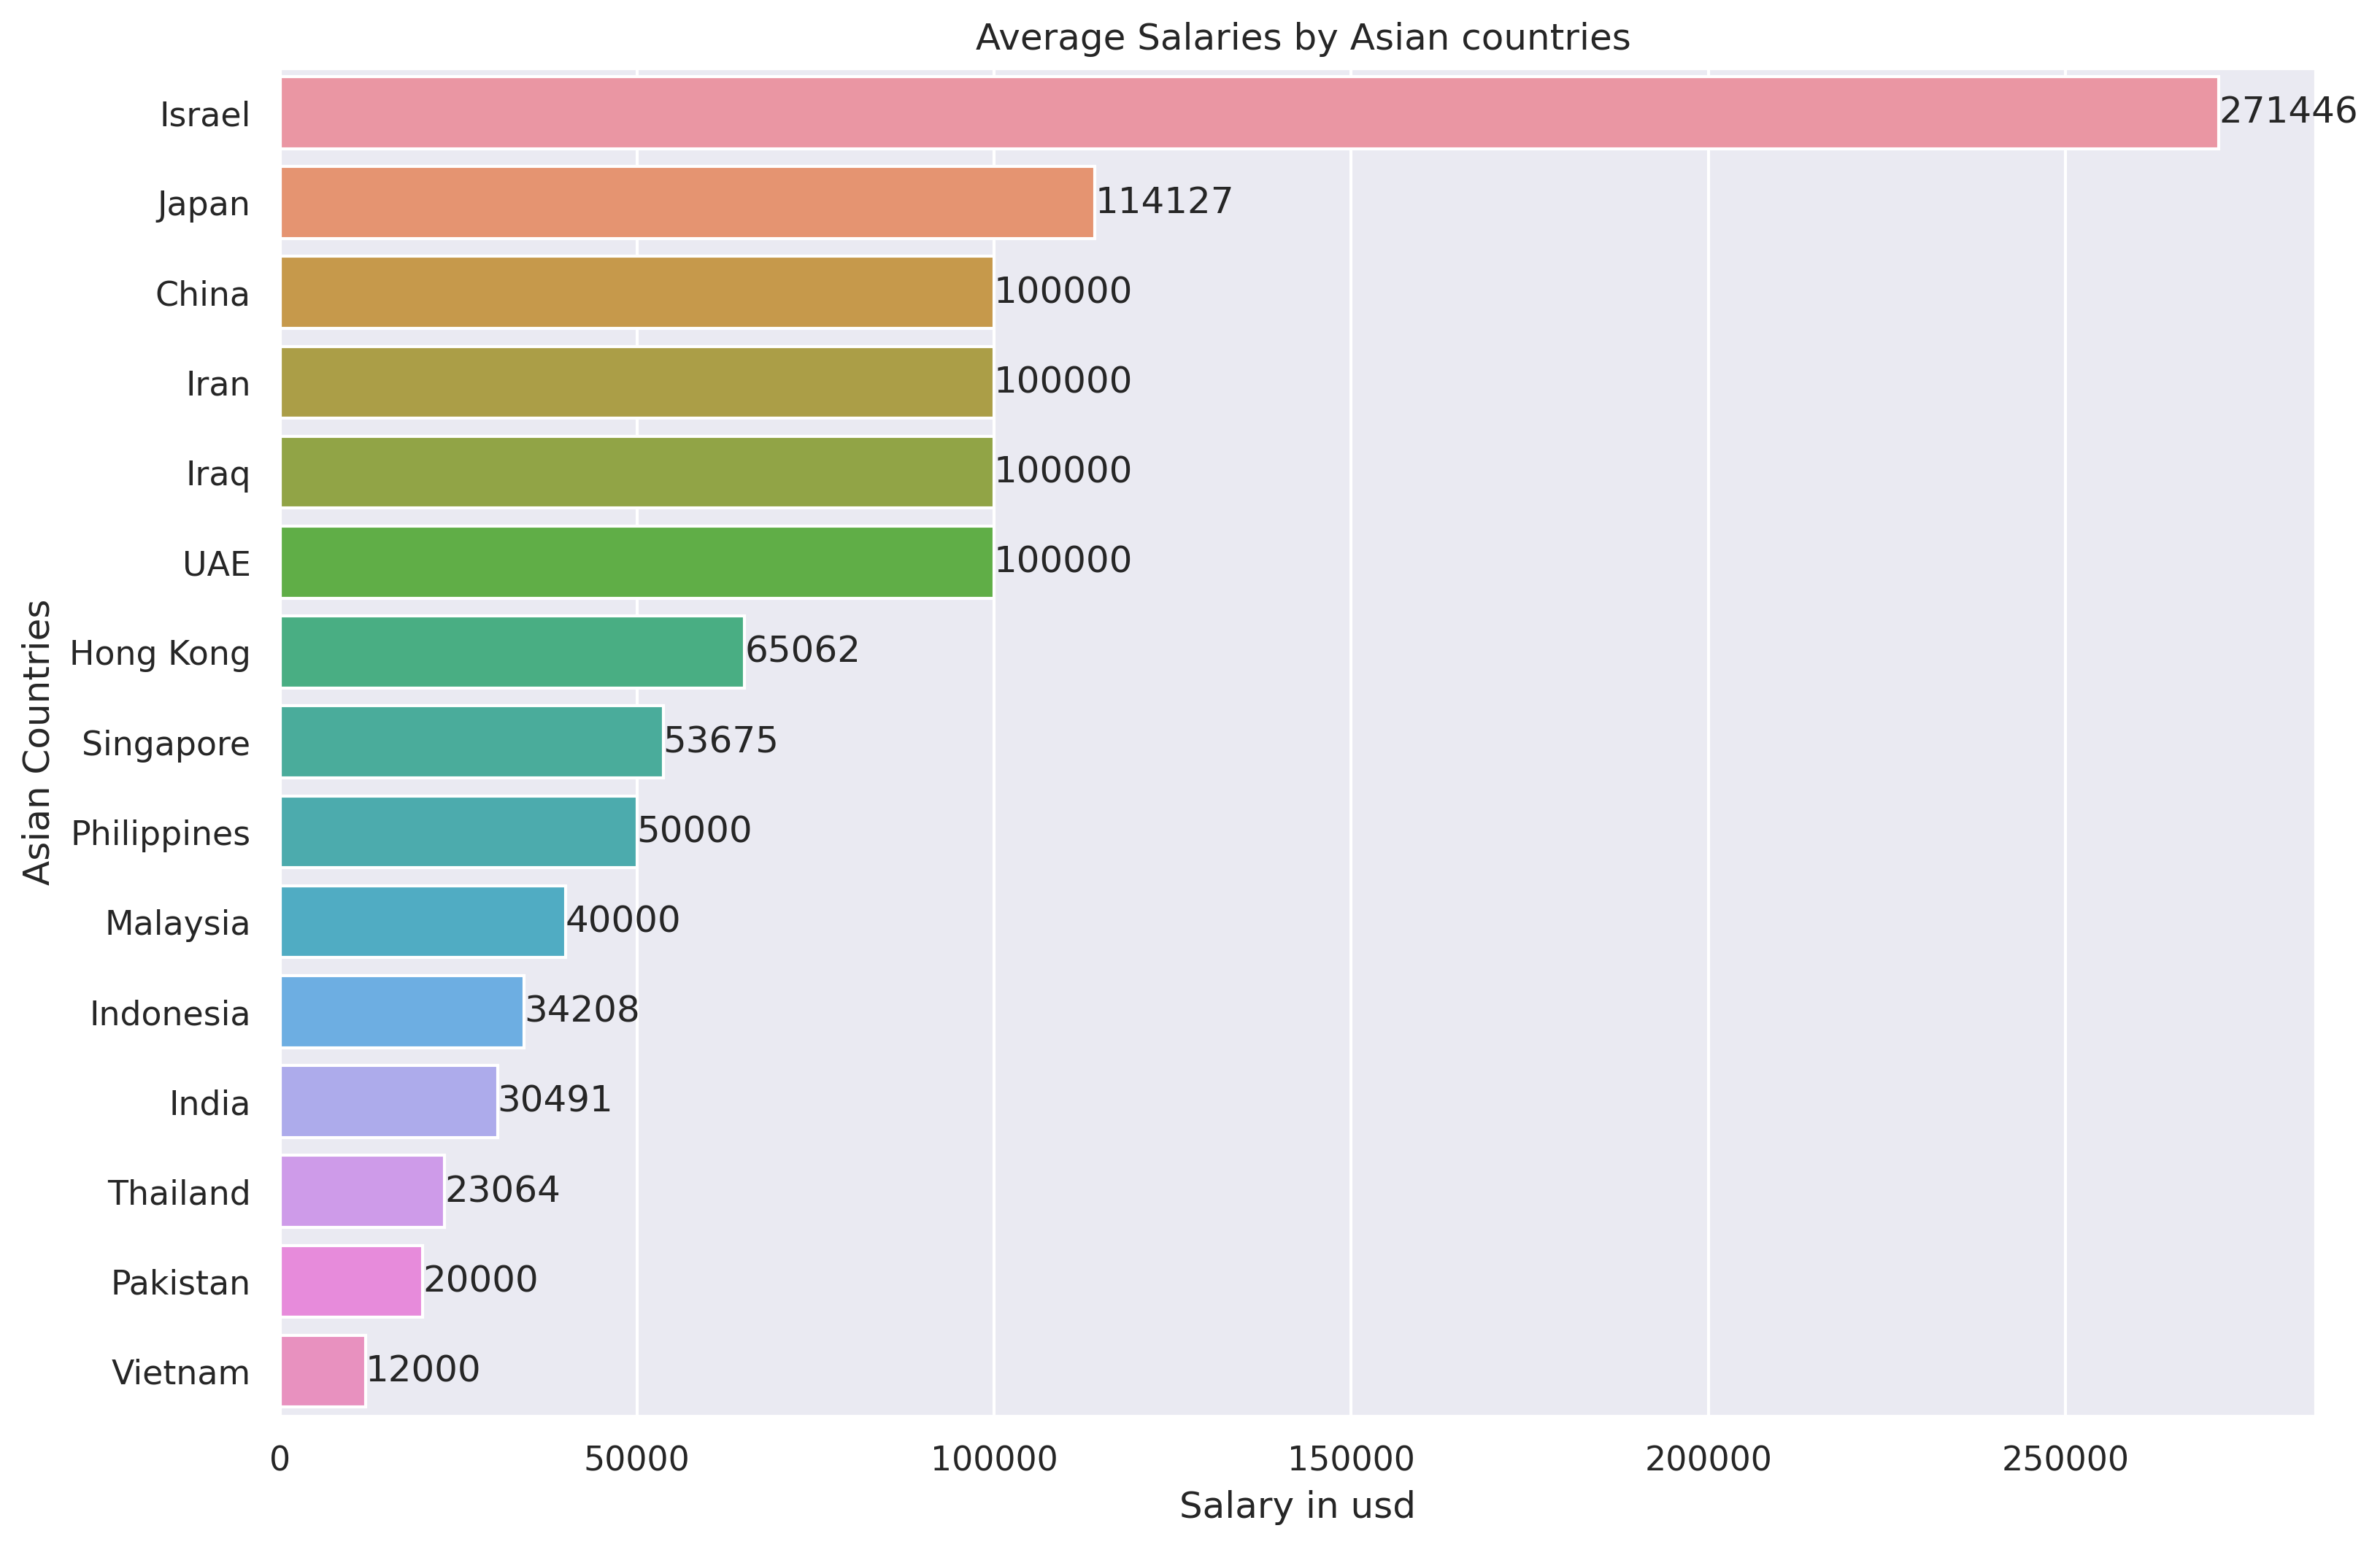

In [ ]:
plt.figure(facecolor = "white",figsize=(12,8))
ax = sns.barplot(data = AVG_Salary_country_in_Asia , y = "country", x = "salary_in_usd")
ax.set(ylabel='Asian Countries',xlabel='Salary in usd', title=' Average Salaries by Asian countries')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
JOB_TYPES = {
    "Machine Learning Engineer": ["machine learning", "autonomous", "ai", "mlops", "computer vision", "deep learning", "ml", "nlp", "research engineer"],
    "Data Scientist": ["science", "scientist"],
    "Data Architect": ["architect"],
    "Data Engineer": ["data engineer", "etl", "engineer"],
    "Data Analyst": ["analyst", "analytics", "bi", "business intelligence"],
}

def map_job_title(title):
    title = title.lower()
    for job_type, keywords in JOB_TYPES.items():
        if any(keyword in title for keyword in keywords):
            return job_type
    return "Other"

Asian_companies["Job_Type"] = [map_job_title(title) for title in Asian_companies["job_title"]]

<ipython-input-62-d0815863525e>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



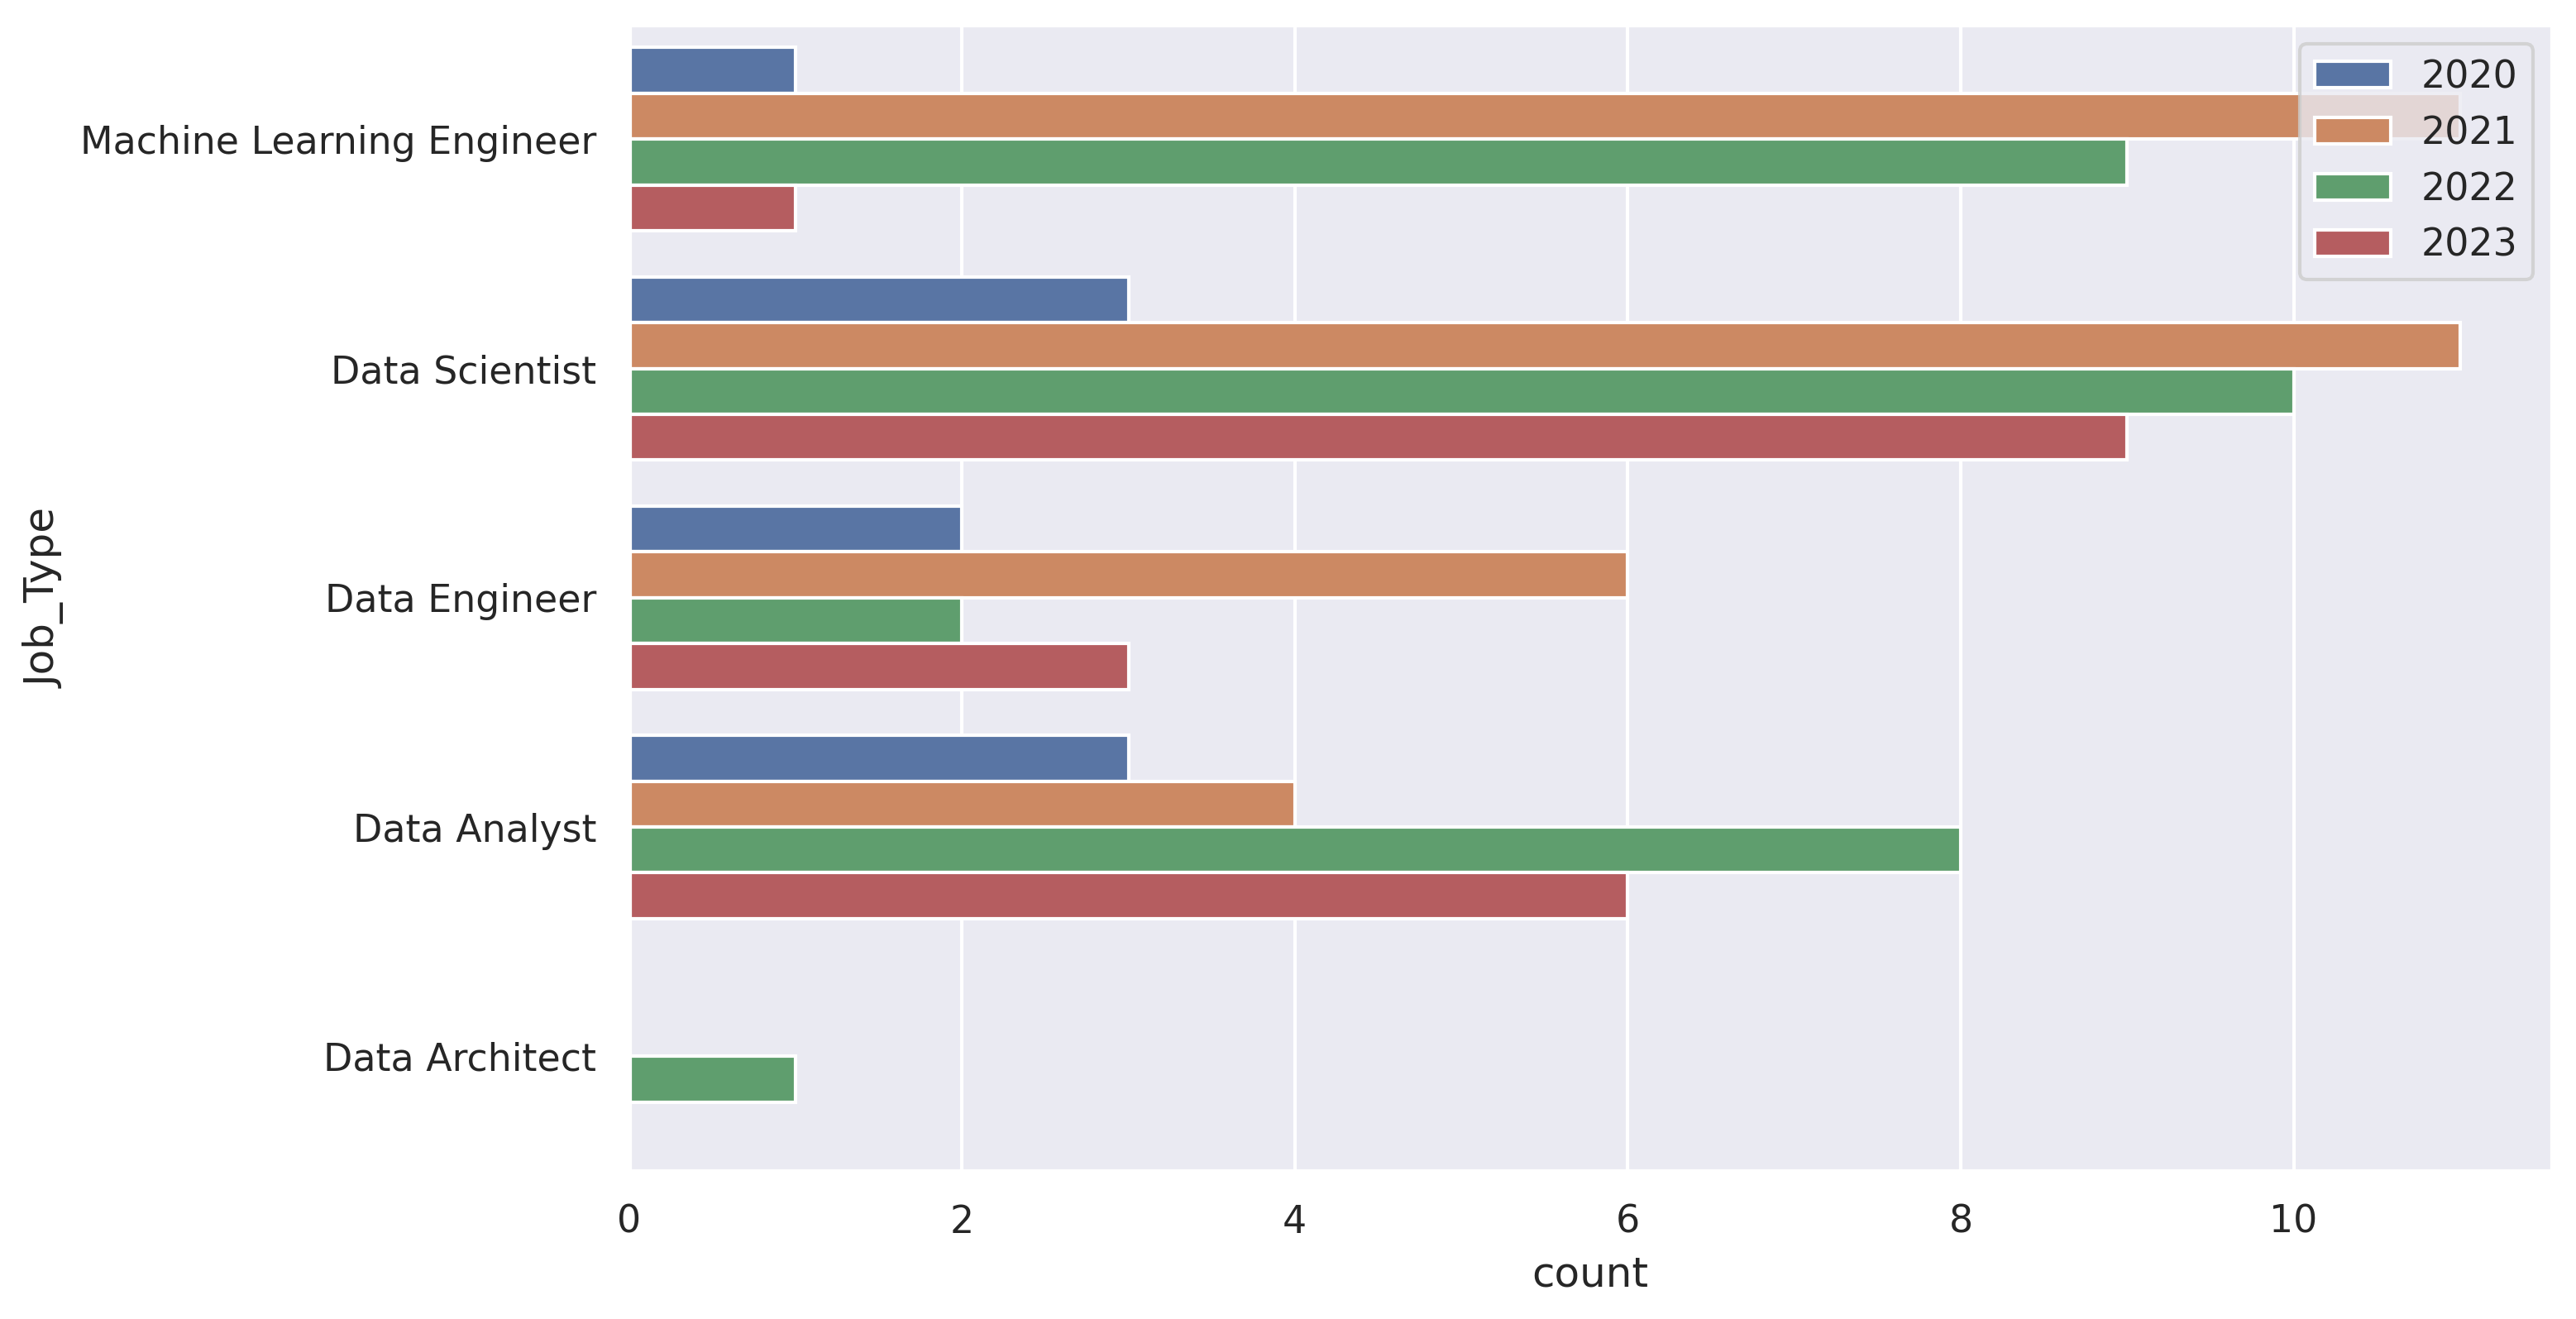

In [ ]:
sns.countplot(data = Asian_companies[Asian_companies['Job_Type'] != "Other"], y = 'Job_Type', hue = 'work_year')
# rotate the x-axis labels by 90 degrees
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
job_type_year = Asian_companies["Job_Type"].value_counts()
job_type_year

Data Scientist               33
Machine Learning Engineer    22
Data Analyst                 21
Data Engineer                13
Data Architect                1
Name: Job_Type, dtype: int64

In [ ]:
# Salary based on job type in Asia
job_type_Asia = merge1[merge1['continent_x'] == 'Asia']
average_job_type_in_Asia = job_type_Asia.groupby('employment_type').agg({'salary_in_usd':'mean'}).round(0).sort_values('salary_in_usd', ascending=False)
average_job_type_in_Asia

,salary_in_usd
employment_type,
FT,48313.0
FL,47508.0
PT,11594.0


In [ ]:
# Which job titles are popular by company location worldwide (top 10)
Job_title_by_country=df.groupby('job_title')['company_location'].count().nlargest(10).reset_index()
Job_title_by_country

,job_title,company_location
0,Data Engineer,598
1,Data Scientist,538
2,Data Analyst,396
3,Machine Learning Engineer,206
4,Analytics Engineer,91
5,Research Scientist,65
6,Data Architect,64
7,Data Science Manager,52
8,ML Engineer,34
9,Research Engineer,33


In [ ]:
# Top most popular job titles in Asia
top15_job_titles = Asian_companies['job_title'].value_counts()[:15]
fig = px.bar(y = top15_job_titles.values, x = top15_job_titles.index,
            text = top15_job_titles.values, title = 'Top 15 Job Designations')
fig.update_layout(xaxis_title = "Job Designations", yaxis_title = "Count")
fig.show()

Jobs in the Data analysis industry such as Data scientist, Data analyst, Data Engineer are still the most popular jobs in this area.

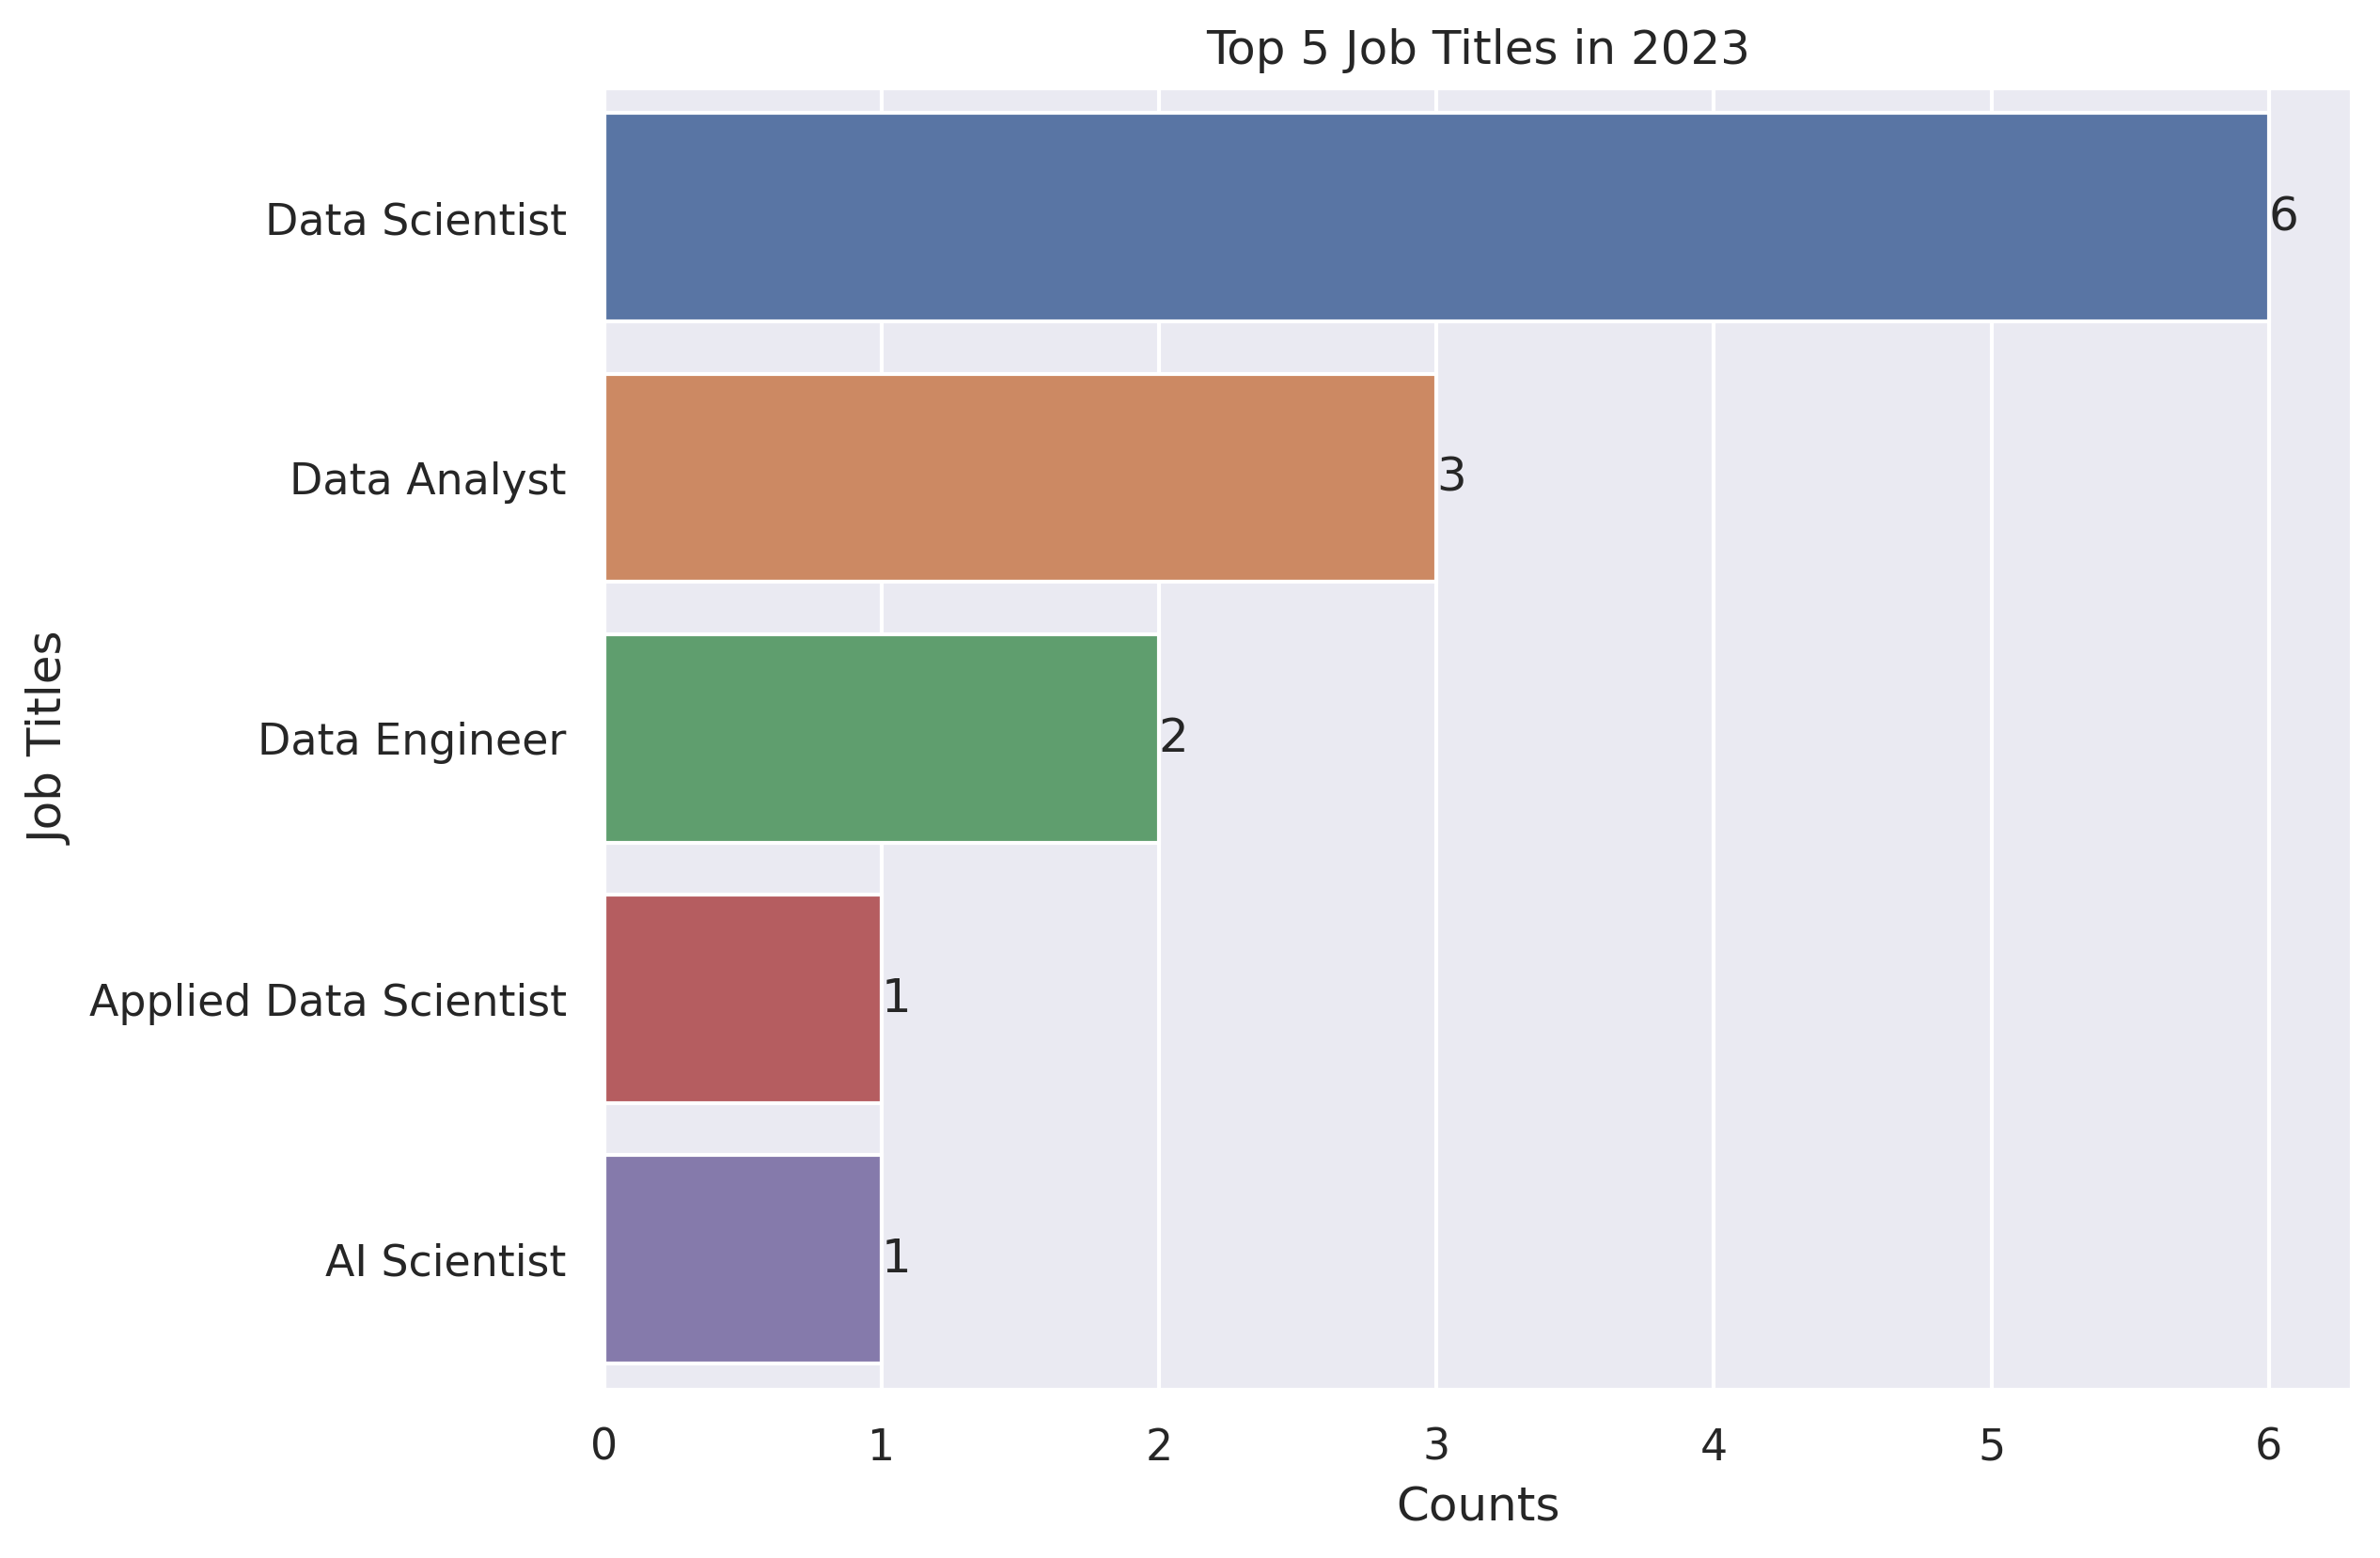

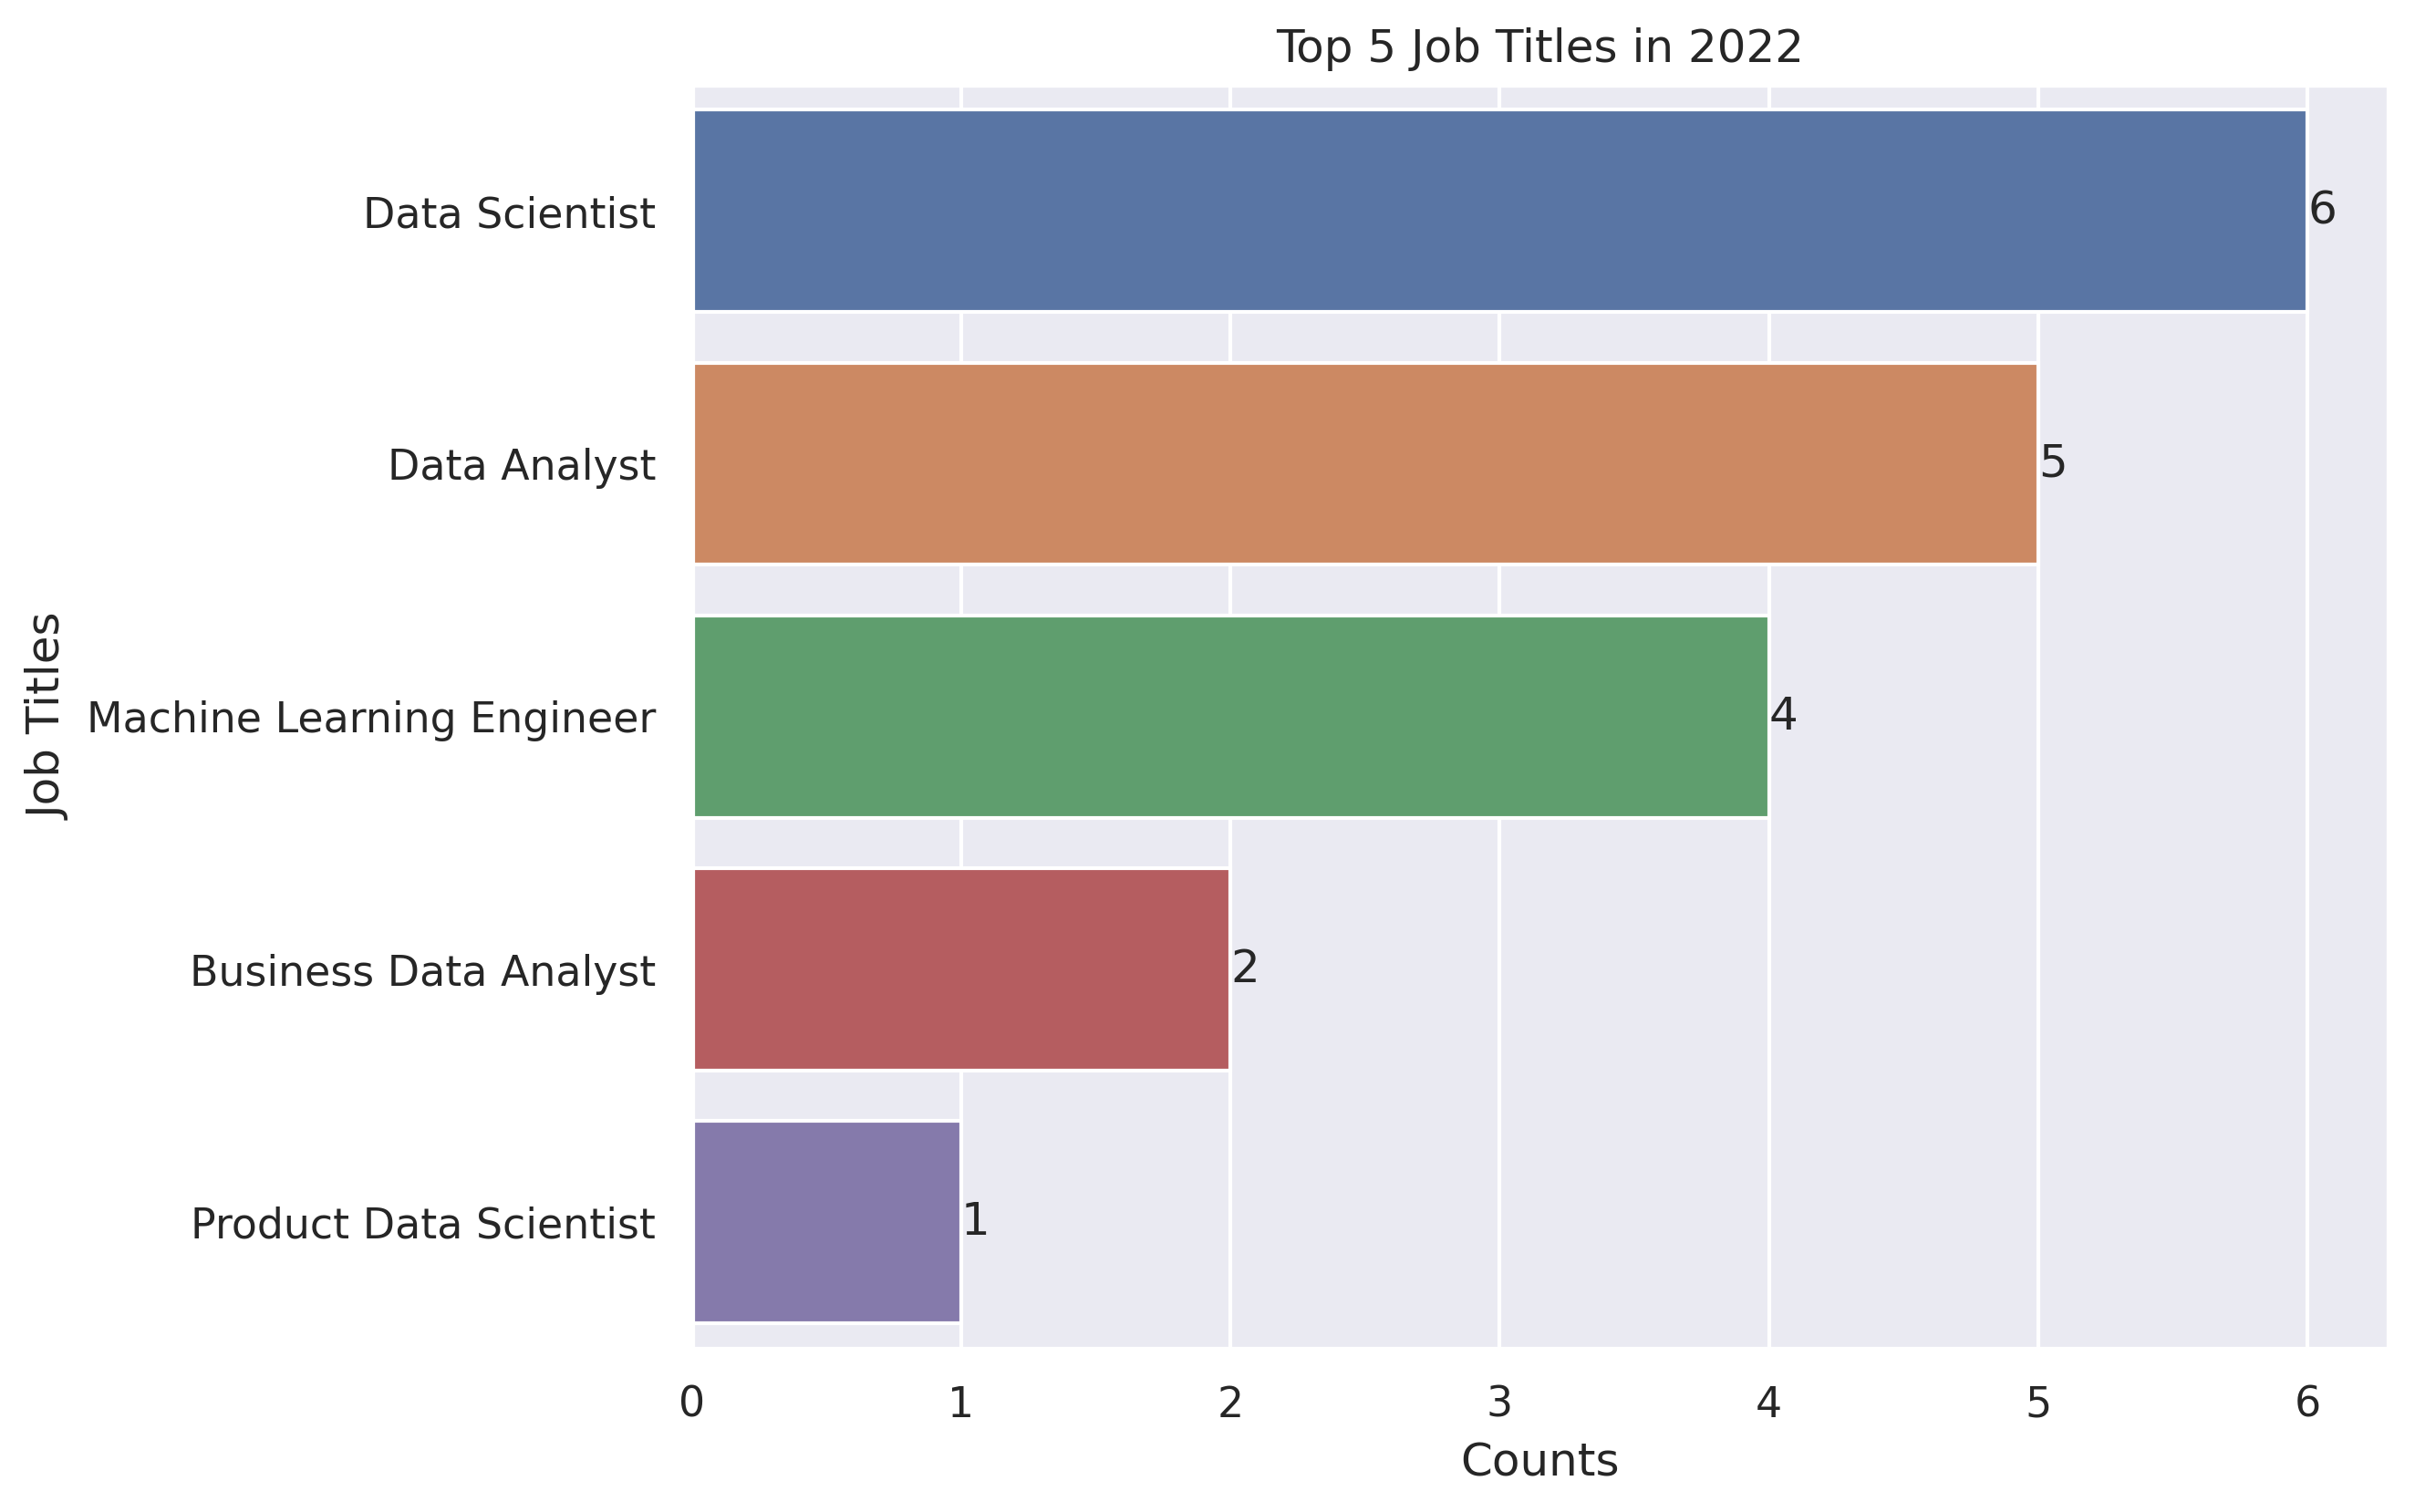

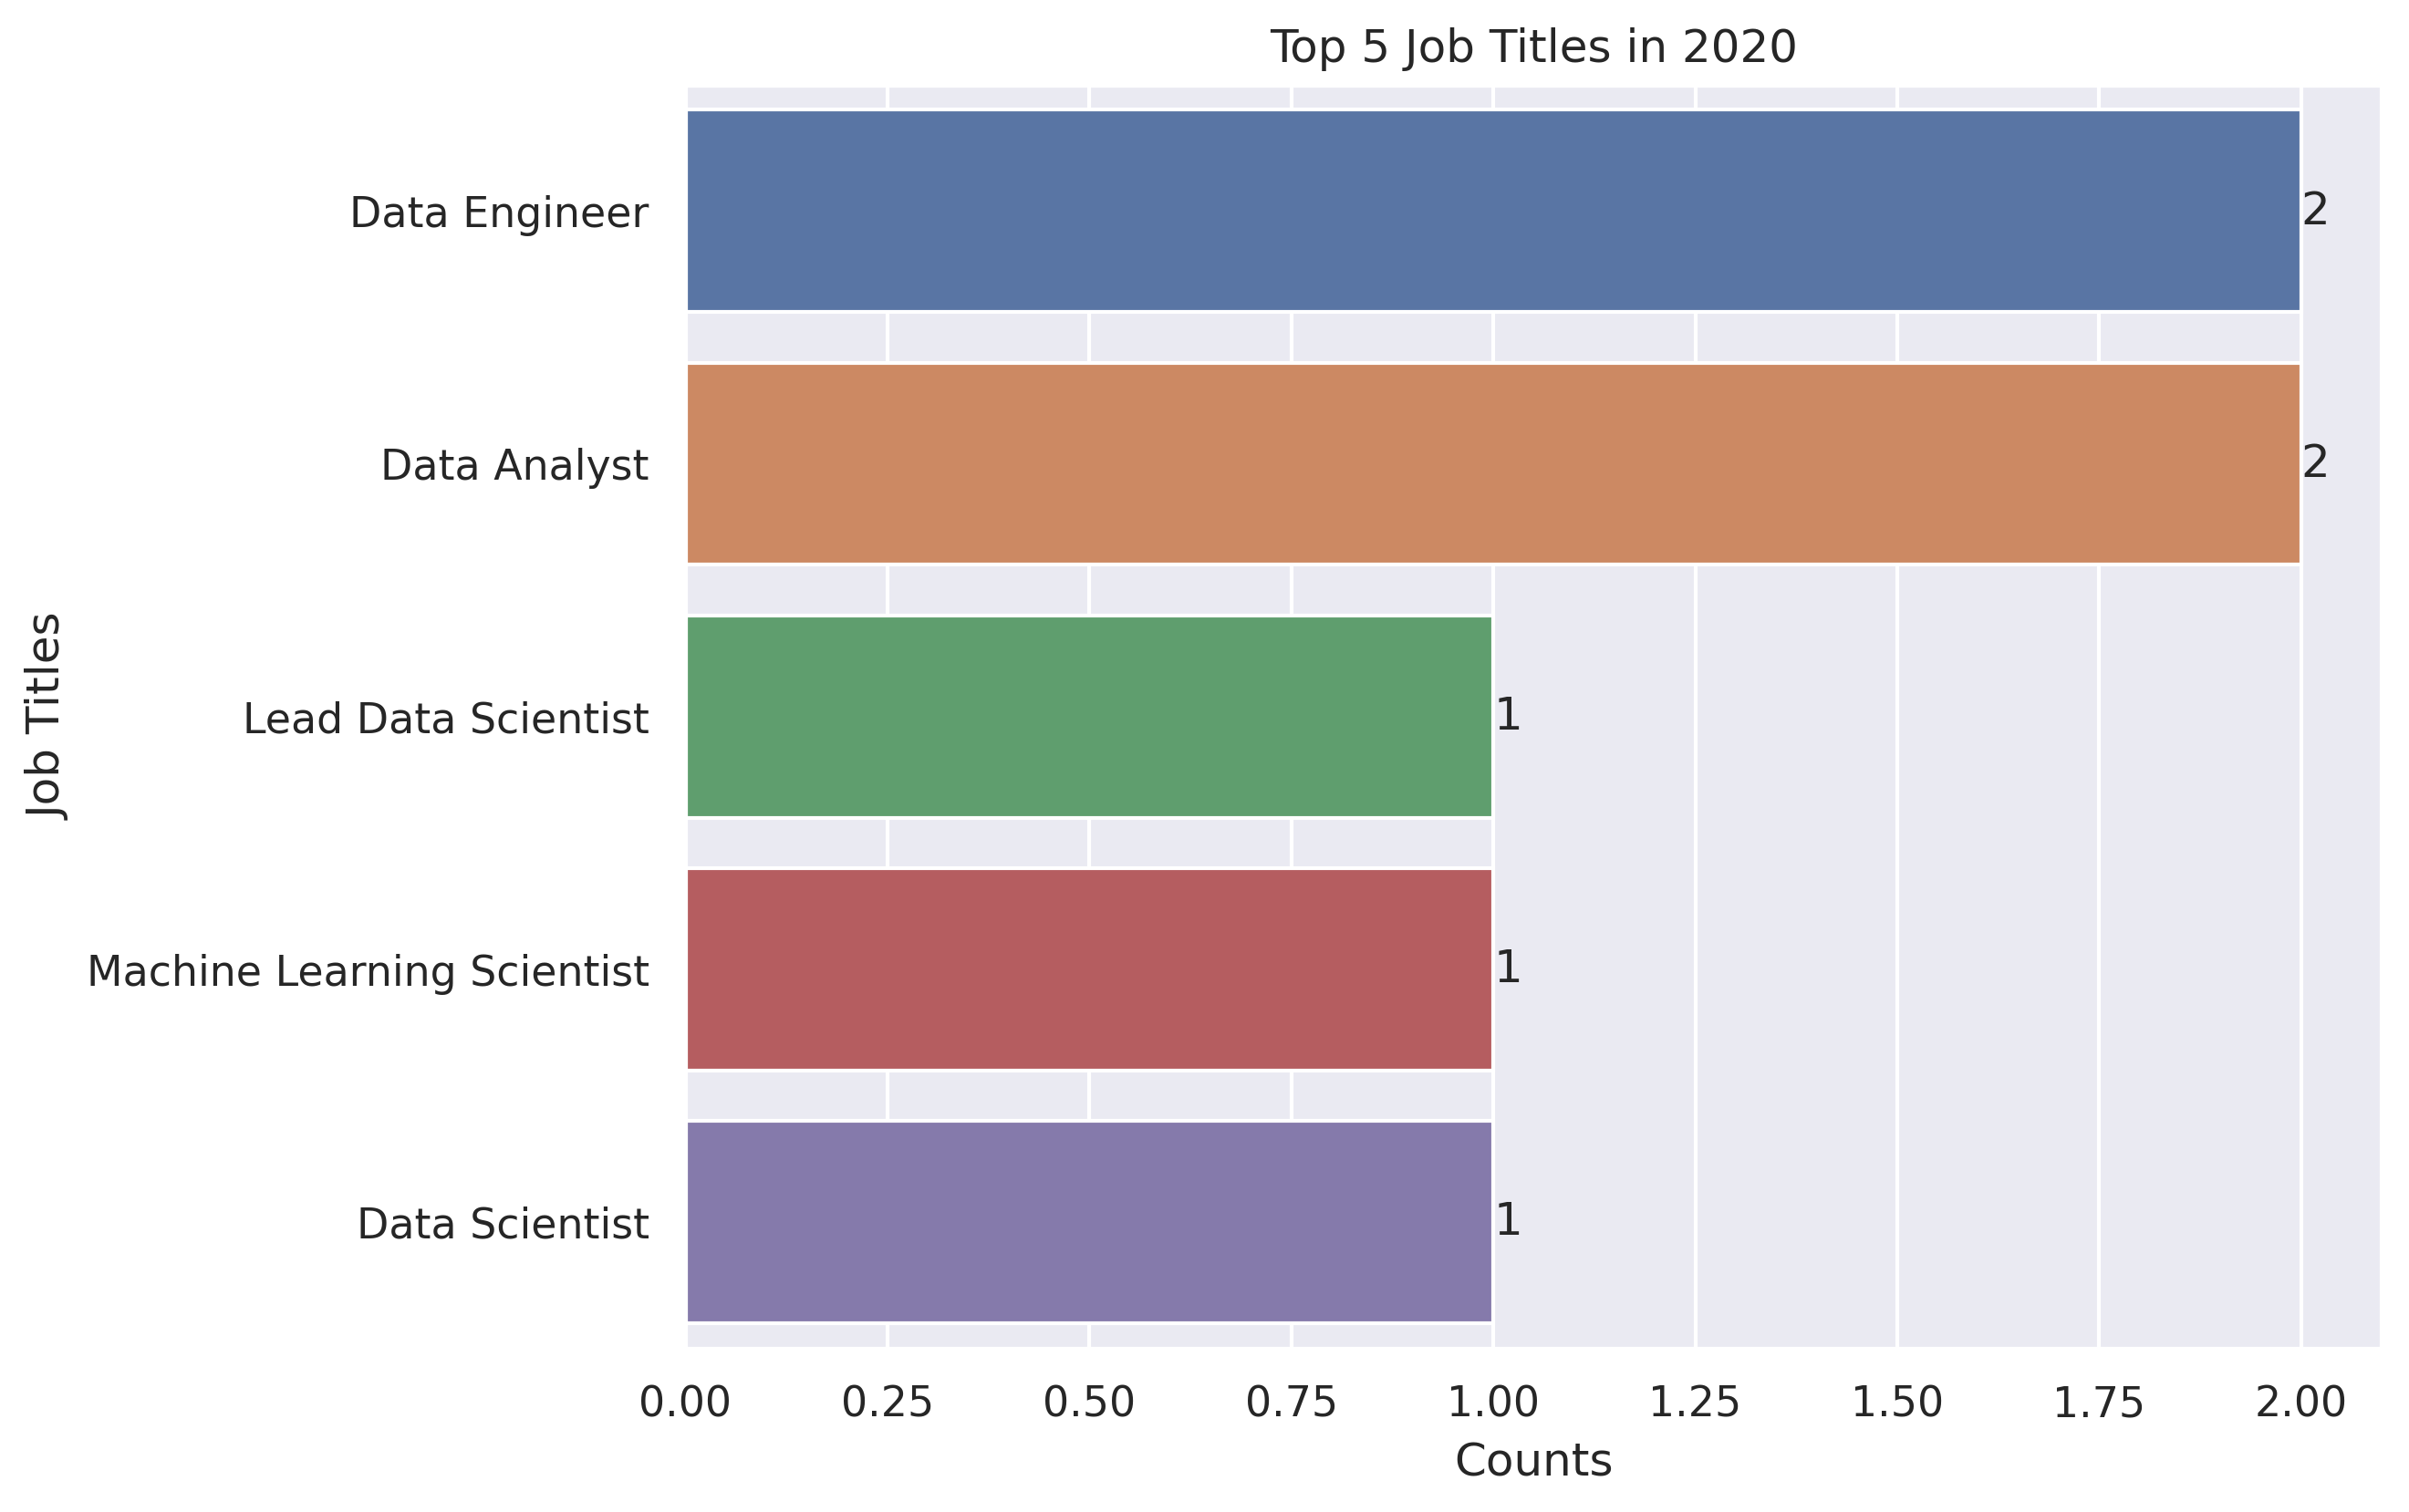

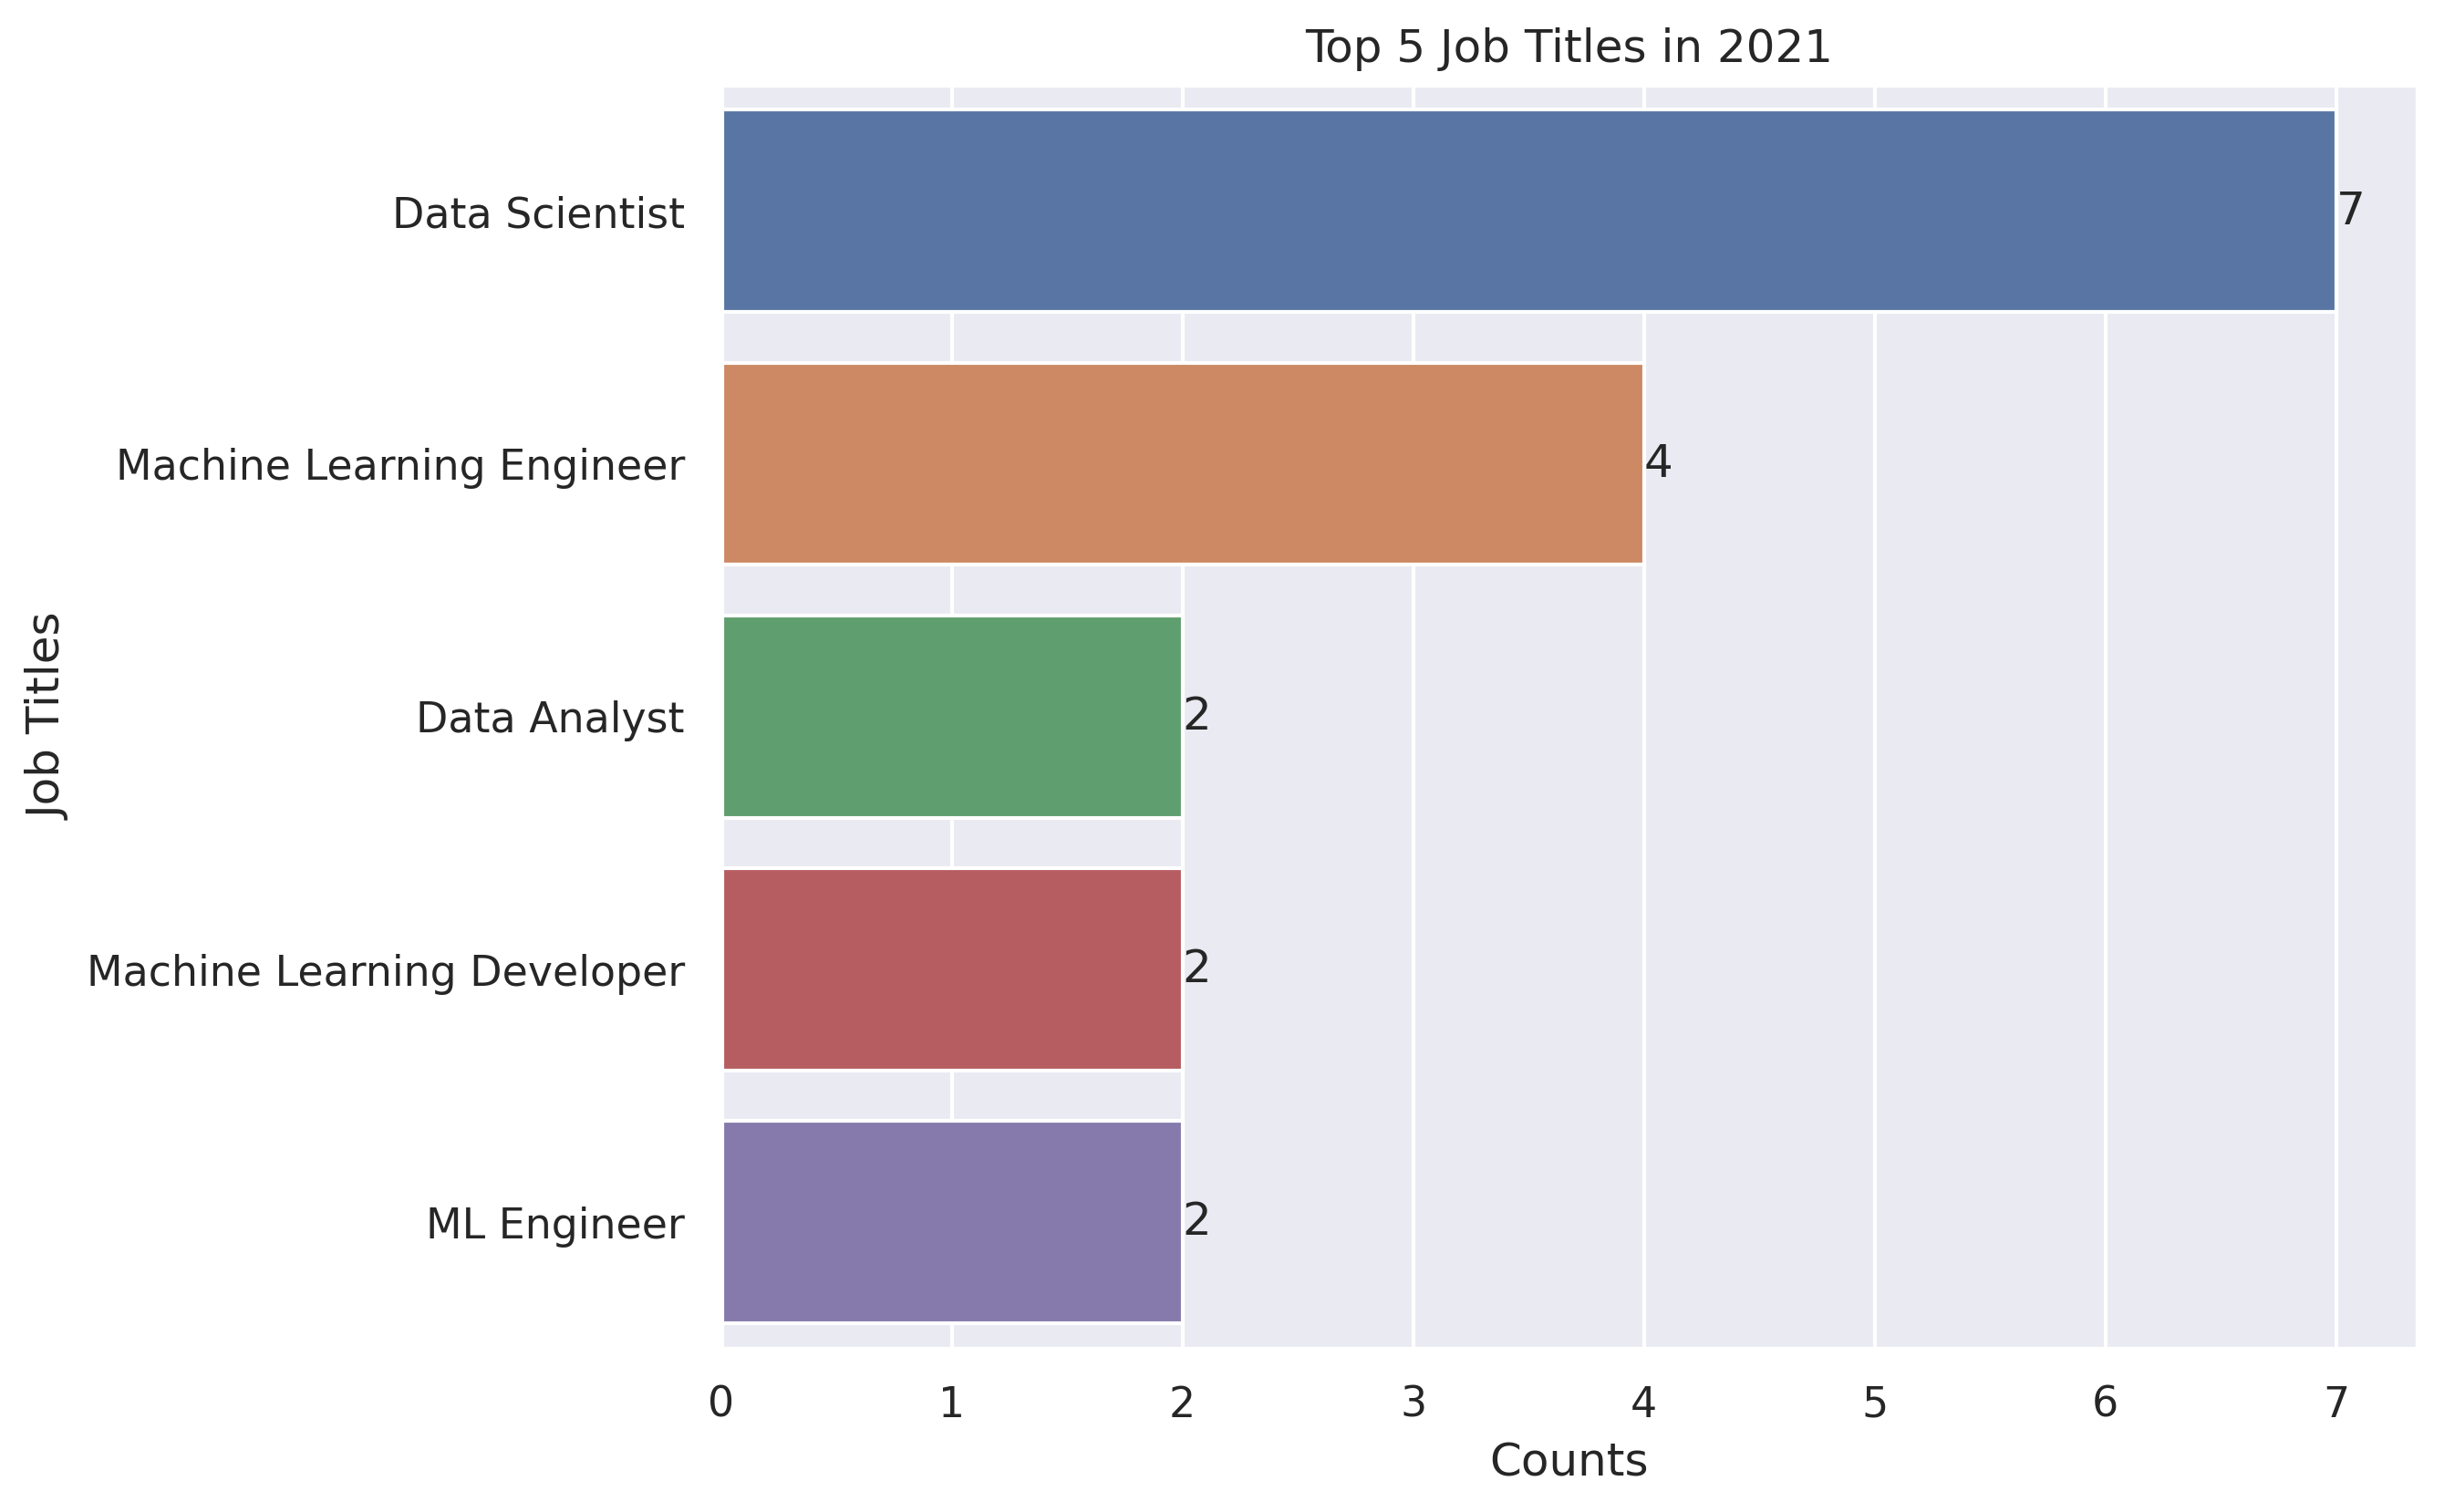

In [ ]:
# Top 5 popular job titles in Asia by work year (2020-2023)

for i in df["work_year"].unique():
    plt.figure(figsize = (8,6))
    ax = sns.barplot(y = Asian_companies[Asian_companies['work_year']==i]['job_title'].value_counts().nlargest(5).index,
                     x = Asian_companies[Asian_companies['work_year']==i]['job_title'].value_counts().nlargest(5))
    ax.set(ylabel='Job Titles',xlabel='Counts', title=f'Top 5 Job Titles in {i}')
    ax.bar_label(ax.containers[0])
    plt.show()

In [ ]:
# average salary of job title in Asia
job_title_average_salary = merge1[merge1['continent_x'] == 'Asia']
job_title_average_salary_Asia = job_title_average_salary.groupby('job_title')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index().head(50)
job_title_average_salary_Asia

,job_title,salary_in_usd
0,AI Scientist,423834.0
1,AI Developer,300000.0
2,Director of Data Science,168000.0
3,Machine Learning Scientist,136000.0
4,Lead Machine Learning Engineer,95386.0
5,Data Science Manager,94665.0
6,Cloud Data Engineer,89294.0
7,Head of Machine Learning,76309.0
8,Software Data Engineer,75020.0
9,Lead Data Scientist,70764.0


In [ ]:
# average salary of each continent group
AVG_salary = merge1.groupby(['continent_x'])['salary_in_usd'].mean()
print (AVG_salary)

continent_x
Africa       53306.428571
Americas    149788.917681
Asia         47470.600000
Europe       75454.198044
Oceania      74084.500000
Name: salary_in_usd, dtype: float64


In [ ]:
# Average salary based on experience level in Asia
experience_level_salary_Asia = merge1[merge1['continent_x'] == 'Asia']
experience_level_salary_Asia_grouped = experience_level_salary_Asia.groupby('experience_level')['salary_in_usd'].mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
experience_level_salary_Asia_grouped

,experience_level,salary_in_usd
0,Senior,94723.0
1,Executive-level,76309.0
2,Mid-level,35654.0
3,Entry-level,35551.0


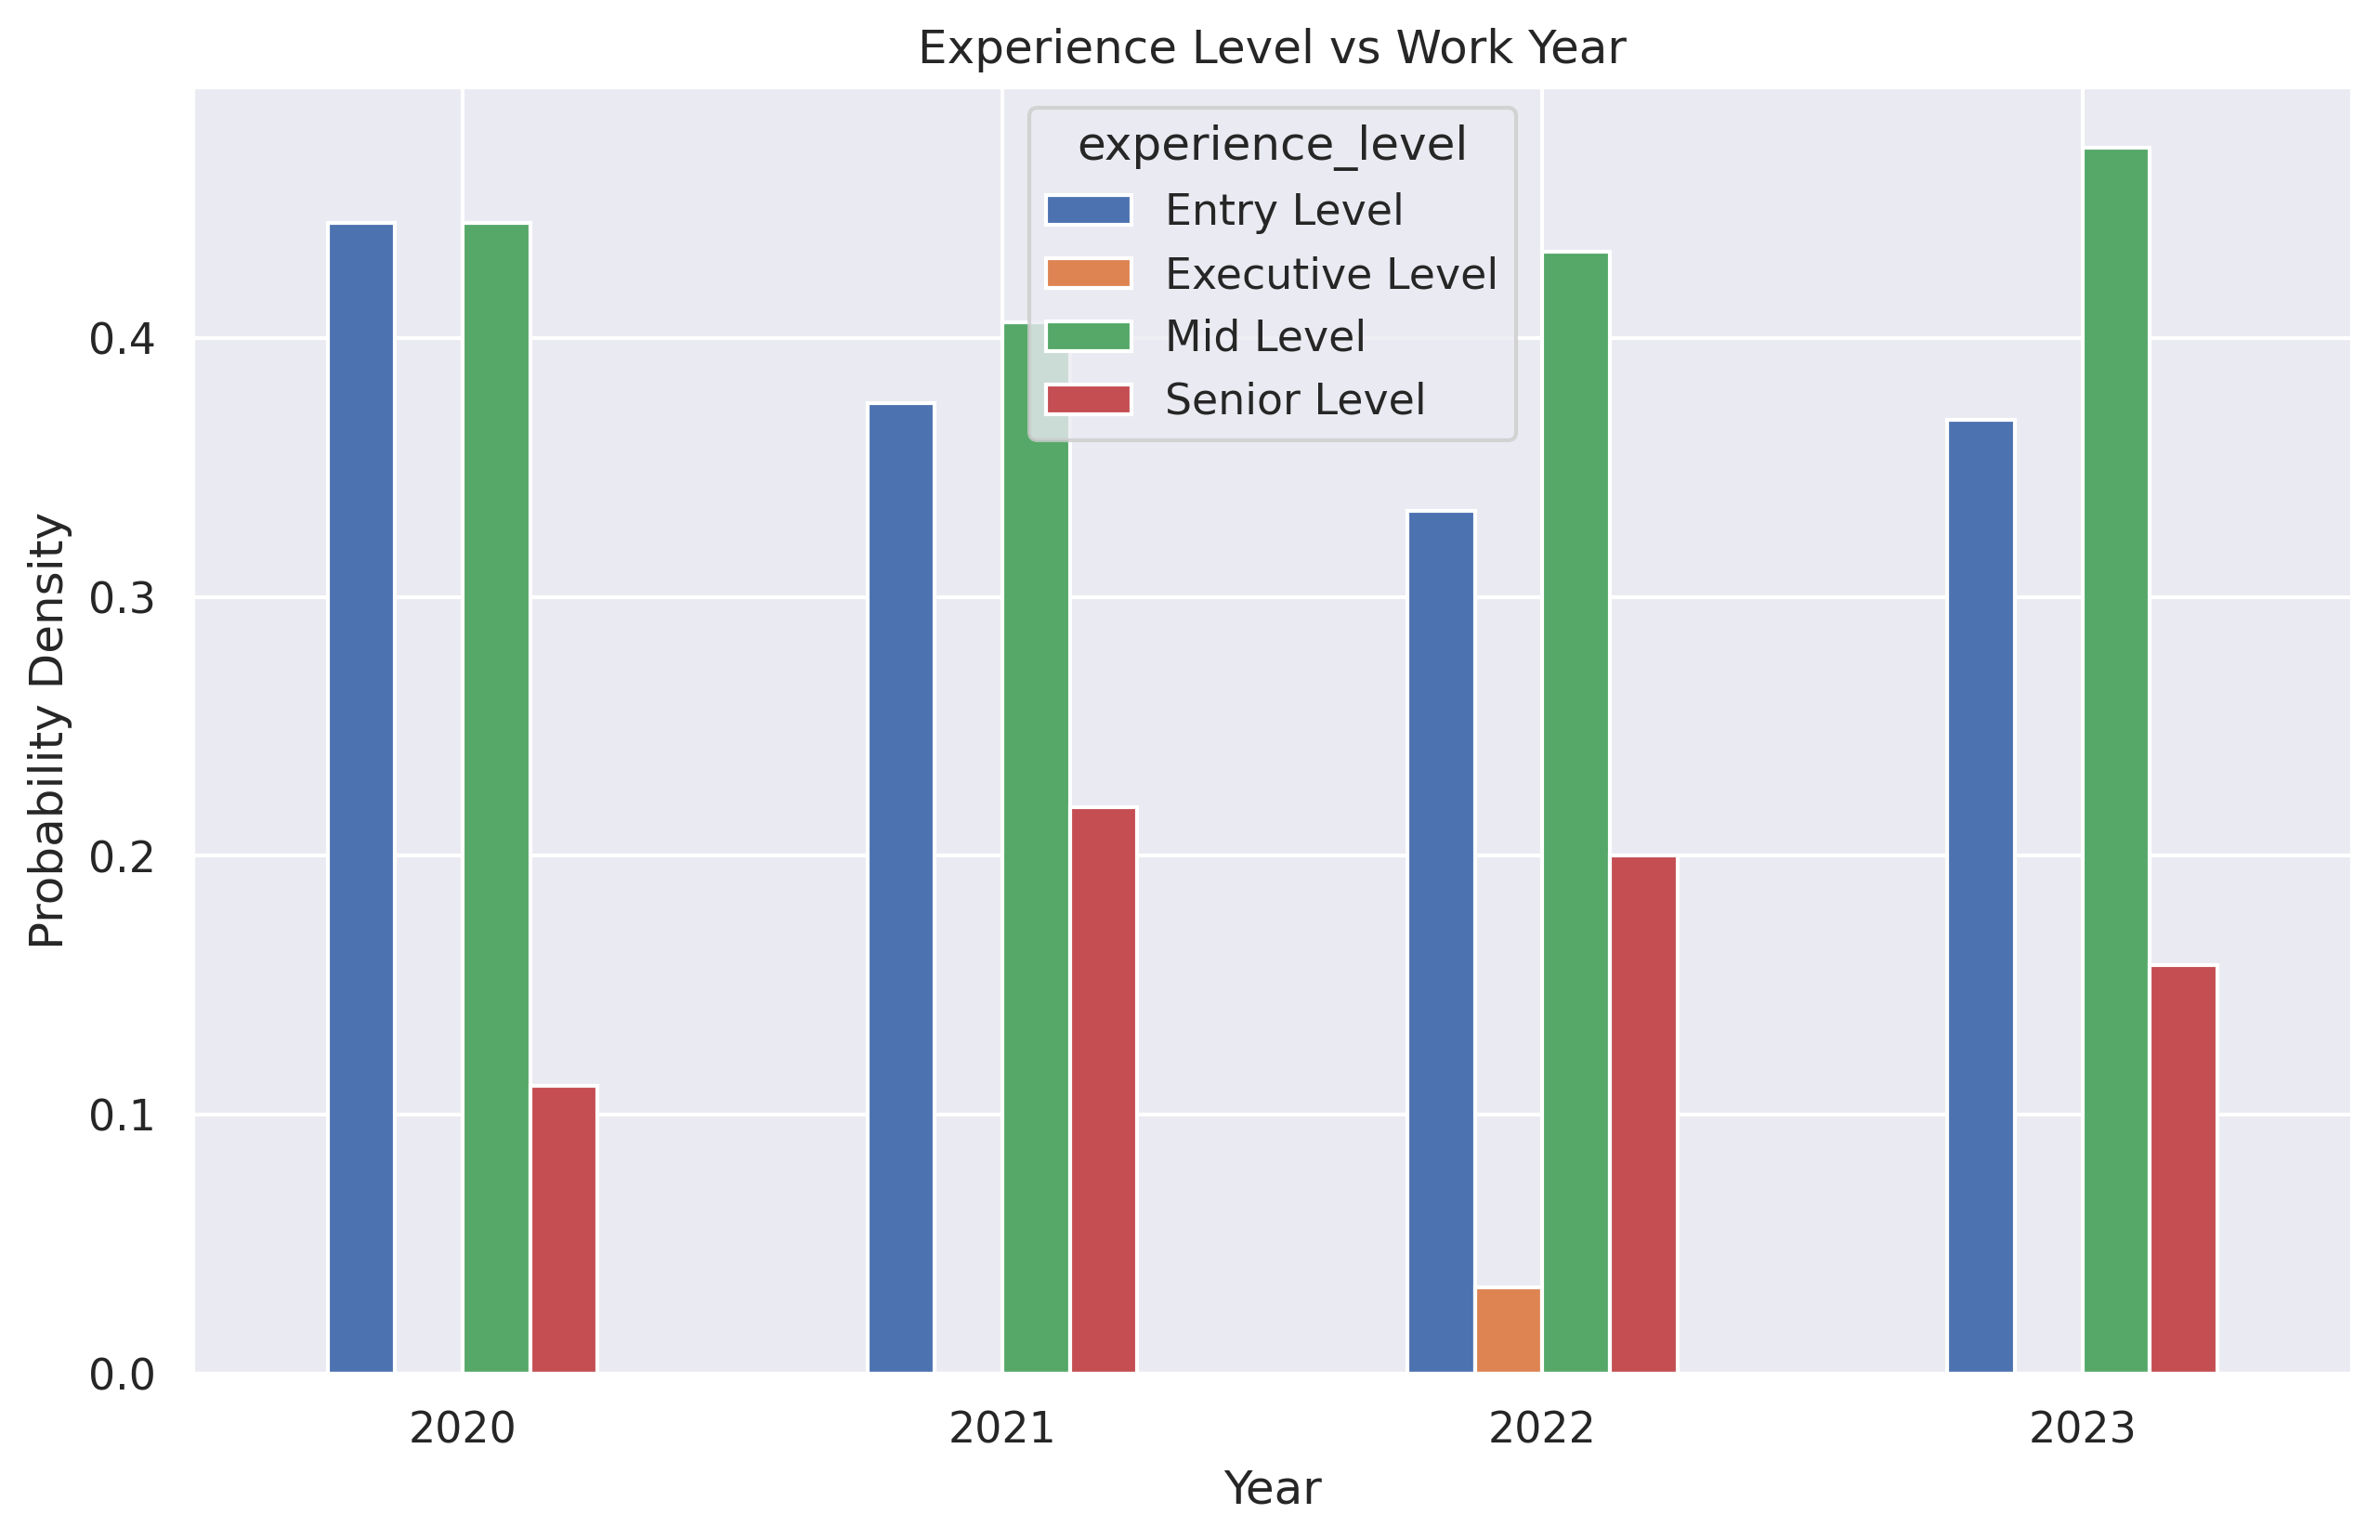

In [ ]:
# Analyze the relationship between work year and experience level

pd.crosstab(Asian_companies['work_year'],Asian_companies['experience_level'], normalize = 'index').plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.title('Experience Level vs Work Year')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Average entry level salary in Asia according to work year
Entry_salary_Asia = Asian_companies[(Asian_companies['experience_level']=='Entry Level')]
Entry_salary_Asia_by_workyear = Entry_salary_Asia.groupby(['experience_level','work_year'])['salary_in_usd'].mean().round(0)
print(Entry_salary_Asia_by_workyear)

experience_level  work_year
Entry Level       2020         16740.0
                  2021         37166.0
                  2022         57011.0
                  2023         16026.0
Name: salary_in_usd, dtype: float64


In [ ]:
# top 10 companies in Asia based on remote ratio (ratio working from home)
df_pivot = Asian_companies.groupby(['company_location', 'remote_ratio']).size().reset_index(name="count")
df_pivot = df_pivot.pivot_table(index='company_location', columns='remote_ratio', values='count', fill_value=0)
df_pivot.sort_values('Remote', ascending=False).head(10)


remote_ratio,Hybrid,On-site,Remote
company_location,,,
IN,20,29,8
JP,3,1,2
AE,0,2,1
CN,0,0,1
HK,0,0,1
ID,0,1,1
IL,0,1,1
PK,2,1,1
VN,0,0,1


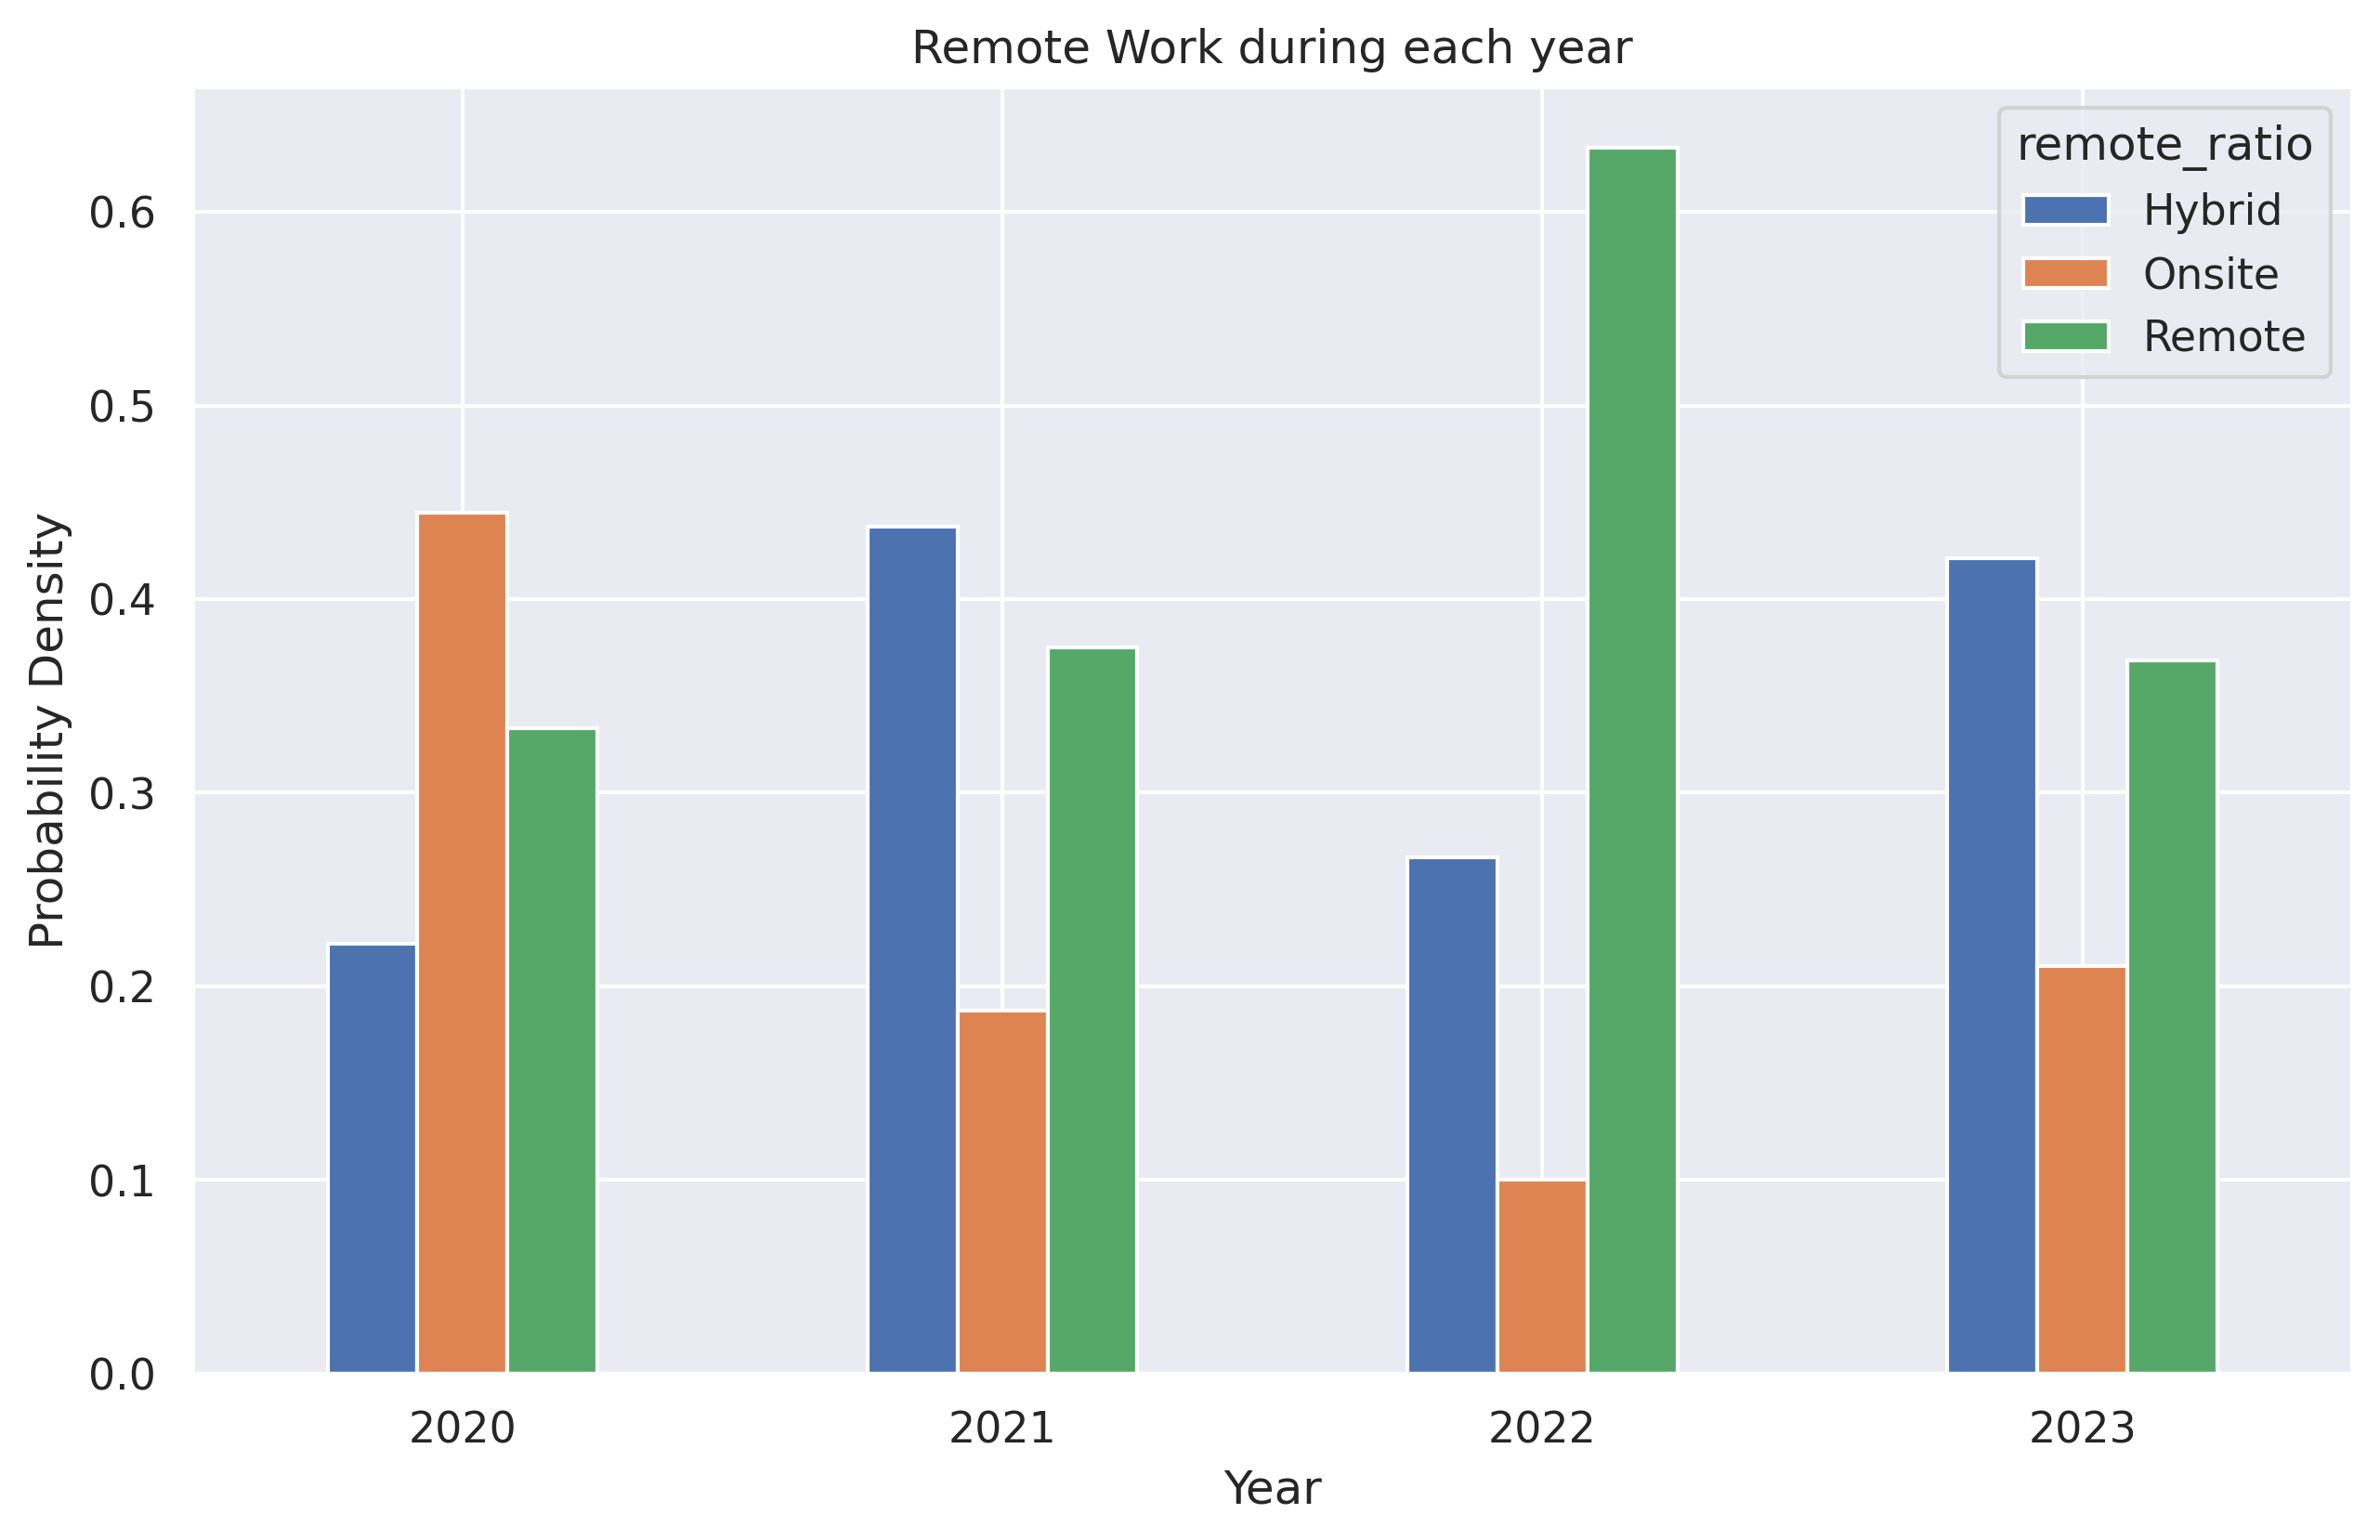

In [ ]:
# work from home ratio 2020-2023
pd.crosstab(Asian_companies['work_year'],Asian_companies['remote_ratio'], normalize = 'index').plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.title('Remote Work during each year')
plt.show()

During the COVID-19 pandemic (2020-2022) in Asia, the proportion of employees working remotely increased significantly while on-site employees decreased.
Due to the implementation of the global vaccination program, as more people are vaccinated, the proportion of employees working at the company begins to increase (2022-2023). In 2023, more than 20% of employees returned to work in person, and hybrid work opportunities (working from home and at the company) increased significantly compared to 2022.

This shows that employees in this industry are too used to working remotely and this also proves that data science is a convenient and flexible industry that can be done anywhere.

Recap:
- The % of employees working remotely increased significantly while the number of employees working on site decreased.

- Employees in this industry are too used to working remotely.

- Proves that data science is a convenient and flexible industry that can be done anywhere.





**CONCLUSION**

The need to recruit highly skilled personnel in Asian countries in general and Southeast Asia in particular is increasingly high, so career orientation and participation in courses at schools and training centers are increasing. is a new step for everyone to fully equip knowledge and skills for the industry.

South Asia is paying low wages compared to other regions in Western countries. Therefore, you can find opportunities in more developed countries, Europe, America, for example.

There are several factors that influence a typical data scientist's income including:

- Job position
- Experience level
- Workplace location
- Industry

Additionally, a candidate's demeanor, attitude, initiative, communication skills, grasping ability, ability to learn quickly, and adaptability are other aspects that can affect their salary. .